In [ ]:
# 나눔 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cashe -fv
!rm ~/.cache/matplotlib -rf
# 순서 : 마운트초기화 > 폰트설치 > 런타임다시시작 > 구글드라이브 마운트 > 나머지 코드...

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
sudo: fc-cashe: command not found


In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')
my_path = '/content/notebooks'
os.symlink('/content/drive/My Drive/Colab Notebooks', my_path)
sys.path.insert(0,my_path)

In [ ]:
import pickle
with open("/content/drive/MyDrive/cakd3_1차프로젝트_2조/dataset/Ldata0920.pkl", "rb") as fh: Ldata = pickle.load(fh)

In [ ]:
Ldata

In [ ]:
data = Ldata['구매상품']
data.head()

In [ ]:
data.query('"')

In [ ]:
data['중분류명=="남성"'].unique()

In [ ]:
data.query('중분류명=="커리어"')['소분류명'].unique()

array(['커리어', '밸류커리어', 'Knit & Knot(캐슬플라자)', '크로커다일 상품군', '안토니모라토 상품군',
       '세이브더칠드런', '커리어 행사', '커리어 단독매입'], dtype=object)

In [ ]:
data.iloc[22751626]

In [ ]:
data.rename(columns={'분류 체계' : '분류체계'}, inplace=True)
data.head()

In [ ]:
# 기본 : 성별, 시기별
# 계열사별

##**여성** 

In [ ]:
data_f = data.query('성별=="F"')
data_f.head()

In [ ]:
AA = A = data.query('제휴사=="A"')
BB = data.query('제휴사=="B"')
CC = data.query('제휴사=="C"')
DD = data.query('제휴사=="D"')

brand_all = [AA,BB,CC,DD]

In [ ]:
A = data_f.query('제휴사=="A"')
B = data_f.query('제휴사=="B"')
C = data_f.query('제휴사=="C"')
D = data_f.query('제휴사=="D"')

brand = [A,B,C,D]

In [ ]:
A['연령대'].value_counts()[:4]

In [ ]:
d['연령대'].value_counts()

In [ ]:
first = data_f.query('분기==1')
second = data_f.query('분기==2')
third = data_f.query('분기==3') 
fourth = data_f.query('분기==4')
분기 = [first, second, third, fourth]

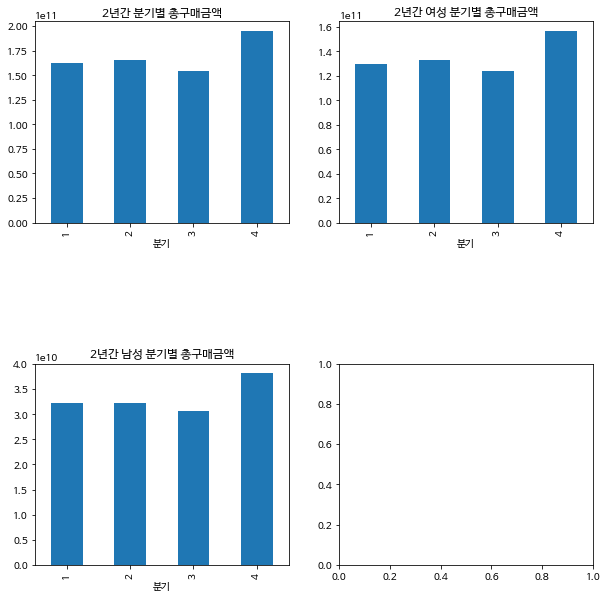

In [ ]:
# 여성 2년간 분기별 계열사별 판매량
fig, axs = plt.subplots(figsize=(10,10), nrows=2, ncols=2)
plt.subplots_adjust(hspace=0.7,wspace=0.2)

data.groupby('분기')['구매금액'].sum().plot(kind='bar',ax=axs[0][0], title='2년간 분기별 총구매금액')
data.query('성별=="F"').groupby('분기')['구매금액'].sum().plot(kind='bar',ax=axs[0][1], title='2년간 여성 분기별 총구매금액')
data.query('성별=="M"').groupby('분기')['구매금액'].sum().plot(kind='bar',ax=axs[1][0], title='2년간 남성 분기별 총구매금액')

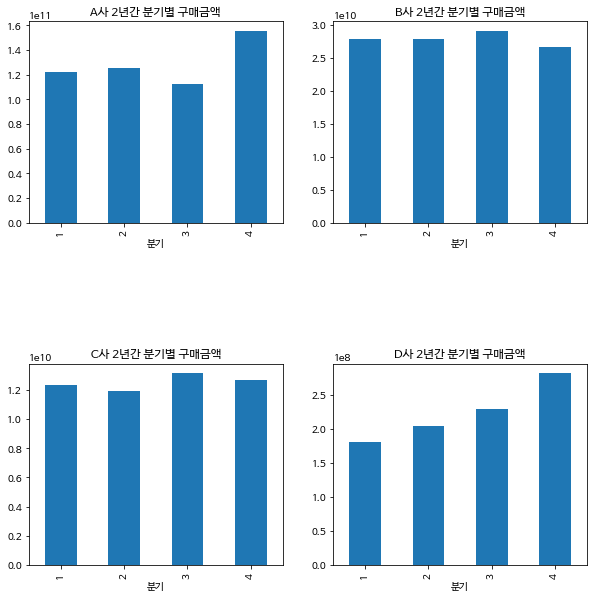

In [ ]:
# 성별통합 2년간 분기별 계열사별 판매량
fig, axs = plt.subplots(figsize=(10,10), nrows=2, ncols=2)
plt.subplots_adjust(hspace=0.7,wspace=0.2)

for num, i in enumerate(brand_all):
  row = int(num/2); col = num%2
  i.groupby('분기')['구매금액'].sum().plot(kind='bar', ax=axs[row][col], title='{}사 2년간 분기별 구매금액'.format(i['제휴사'].unique()[0]))

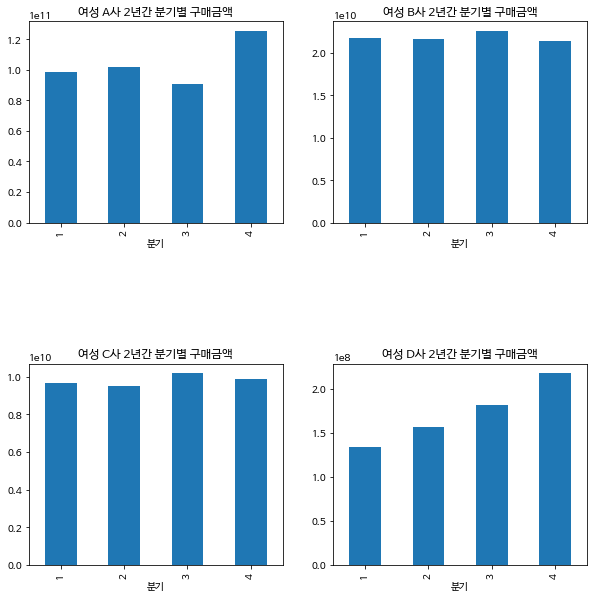

In [ ]:
# 여성 2년간 분기별 계열사별 판매량
fig, axs = plt.subplots(figsize=(10,10), nrows=2, ncols=2)
plt.subplots_adjust(hspace=0.7,wspace=0.2)

for num, i in enumerate(brand):
  row = int(num/2); col = num%2
  i.groupby('분기')['구매금액'].sum().plot(kind='bar', ax=axs[row][col], title='여성 {}사 2년간 분기별 구매금액'.format(i['제휴사'].unique()[0]))

In [ ]:
data_f.groupby('분기')['구매금액'].sum()
# data_f.query('년==2014').groupby('분기')['구매금액'].mean()

분기
1    129841929340
2    133071505776
3    123757460292
4    156838173626
Name: 구매금액, dtype: int64

In [ ]:
a = data_f['구매금액'].sum()
a/4

135877267258.5

In [ ]:
f2014 = data_f.query('년==2014').groupby('분기')['구매금액'].sum()
f2015 = data_f.query('년==2015').groupby('분기')['구매금액'].sum()

In [ ]:
# f2014.to_frame()
f2014.rename(columns={'구매금액':'2014_구매금액'}, inplace=True)

In [ ]:
# f2015.to_frame()
f2015.rename(columns={'구매금액':'2015_구매금액'}, inplace=True)

f = pd.concat([f2014, f2015], axis=1)
f

In [ ]:
# 여성 연령대별 총구매액 높은순 탑 10
seasons = [1,2,3,4]
Age = ['35세~39세','40세~44세','45세~49세','50세~54세']
fig, axs = plt.subplots(figsize=(20,20), nrows=4, ncols=10)
plt.subplots_adjust(hspace=0.7,wspace=0.2)

for num1,i in enumerate(brand):
    row = bnum1
    for num2, age in enumerate(Age):
        col = num2
        i.query(f'연령대=="{age}"').groupby('중분류명')['구매금액'].sum().sort_values(ascending=False)[:10].plot(kind='bar', ax=axs[row][col],
                            title='{}사 {} TOP 10'.format(i['제휴사'].unique()[0], age))
      

In [ ]:
A.drop(A[A['연령대']=='55세~59세'].index, inplace=True)
A.drop(A[A['연령대']=='60세이상'].index, inplace=True)
A.drop(A[A['연령대']=='30세~34세'].index, inplace=True)
A.drop(A[A['연령대']=='25세~29세'].index, inplace=True)
A.drop(A[A['연령대']=='20세~24세'].index, inplace=True)
A.drop(A[A['연령대']=='19세이하'].index, inplace=True)
A['연령대'].value_counts()

In [ ]:
B.drop(B[B['연령대']=='55세~59세'].index, inplace=True)
B.drop(B[B['연령대']=='60세이상'].index, inplace=True)
B.drop(B[B['연령대']=='30세~34세'].index, inplace=True)
B.drop(B[B['연령대']=='25세~29세'].index, inplace=True)
B.drop(B[B['연령대']=='20세~24세'].index, inplace=True)
B.drop(B[B['연령대']=='19세이하'].index, inplace=True)
B['연령대'].value_counts()

In [ ]:
C.drop(C[C['연령대']=='55세~59세'].index, inplace=True)
C.drop(C[C['연령대']=='60세이상'].index, inplace=True)
C.drop(C[C['연령대']=='30세~34세'].index, inplace=True)
C.drop(C[C['연령대']=='25세~29세'].index, inplace=True)
C.drop(C[C['연령대']=='20세~24세'].index, inplace=True)
C.drop(C[C['연령대']=='19세이하'].index, inplace=True)
C['연령대'].value_counts()

In [ ]:
A['연령대'].value_counts()

In [ ]:
B['연령대'].value_counts()

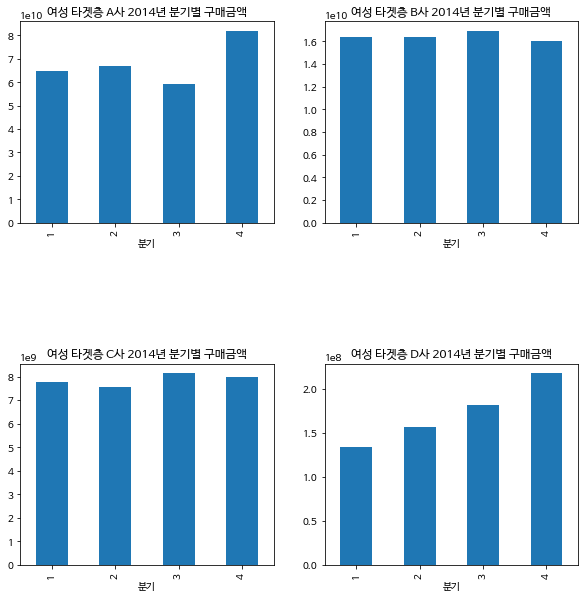

In [ ]:
# 여성 2014년 2년간 계열사별 판매량
fig, axs = plt.subplots(figsize=(10,10), nrows=2, ncols=2)
plt.subplots_adjust(hspace=0.7,wspace=0.2)
brand_new = [A,B,C]
# A['연령대'].value_counts()[:4]
for num, i in enumerate(brand):
  row = int(num/2); col = num%2
  # i = i.query('년==2014')
  i.groupby('분기')['구매금액'].sum().plot(kind='bar', ax=axs[row][col], title='여성 타겟층 {}사 2014년 분기별 구매금액'.format(i['제휴사'].unique()[0]))

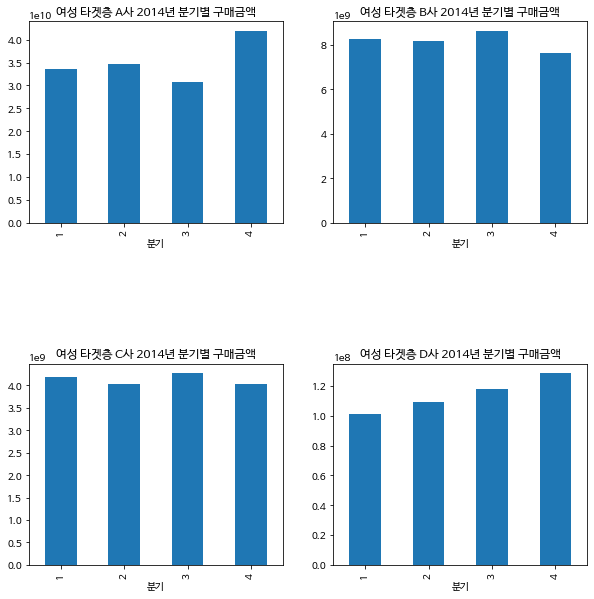

In [ ]:
# 여성 2014년 분기별 계열사별 판매량
fig, axs = plt.subplots(figsize=(10,10), nrows=2, ncols=2)
plt.subplots_adjust(hspace=0.7,wspace=0.2)
# A['연령대'].value_counts()[:4]
for num, i in enumerate(brand):
  row = int(num/2); col = num%2
  i = i.query('년==2015')
  i.groupby('분기')['구매금액'].sum().plot(kind='bar', ax=axs[row][col], title='여성 타겟층 {}사 2014년 분기별 구매금액'.format(i['제휴사'].unique()[0]))

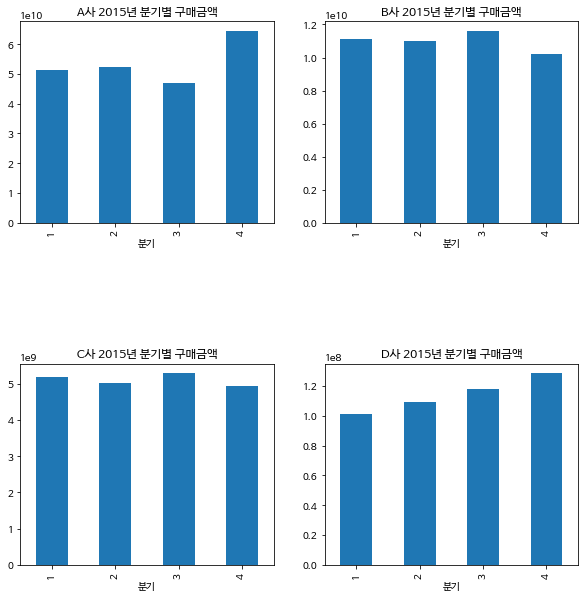

In [ ]:
# 여성 2015년 분기별 계열사별 판매량
fig, axs = plt.subplots(figsize=(10,10), nrows=2, ncols=2)
plt.subplots_adjust(hspace=0.7,wspace=0.2)

for num, i in enumerate(brand):
  row = int(num/2); col = num%2
  i = i.query('년==2015')
  i.groupby('분기')['구매금액'].sum().plot(kind='bar', ax=axs[row][col], title='{}사 2015년 분기별 구매금액'.format(i['제휴사'].unique()[0]))

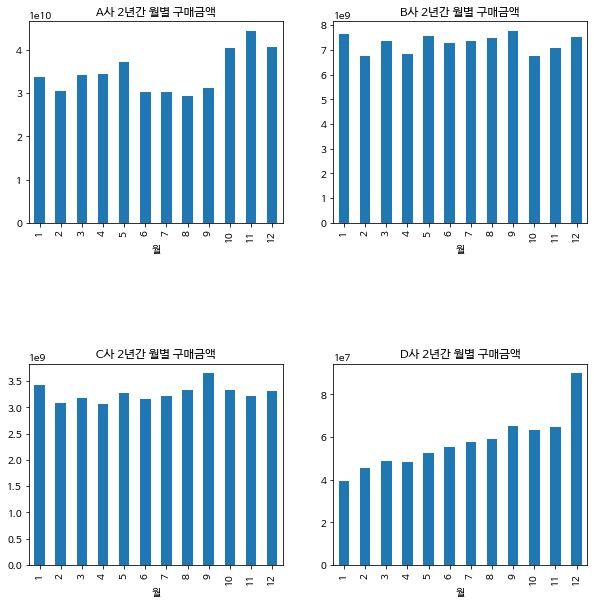

In [ ]:
# 여성 2년간 분기별 계열사별 판매량
fig, axs = plt.subplots(figsize=(10,10), nrows=2, ncols=2)
plt.subplots_adjust(hspace=0.7,wspace=0.2)

for num, i in enumerate(brand):
  row = int(num/2); col = num%2
  # i = i.query('년==2015')
  i.groupby('월')['구매금액'].sum().plot(kind='bar', ax=axs[row][col], title='{}사 2년간 월별 구매금액'.format(i['제휴사'].unique()[0]))

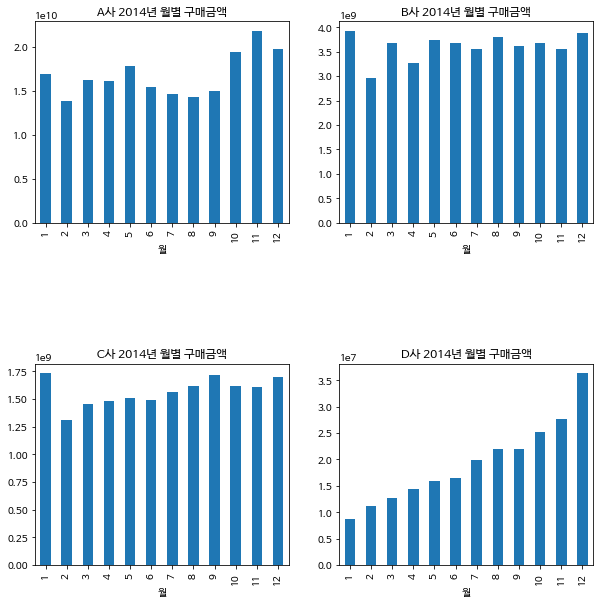

In [ ]:
# 여성 2년간 분기별 계열사별 판매량
fig, axs = plt.subplots(figsize=(10,10), nrows=2, ncols=2)
plt.subplots_adjust(hspace=0.7,wspace=0.2)

for num, i in enumerate(brand):
  row = int(num/2); col = num%2
  i = i.query('년==2014')
  i.groupby('월')['구매금액'].sum().plot(kind='bar', ax=axs[row][col], title='{}사 2014년 월별 구매금액'.format(i['제휴사'].unique()[0]))

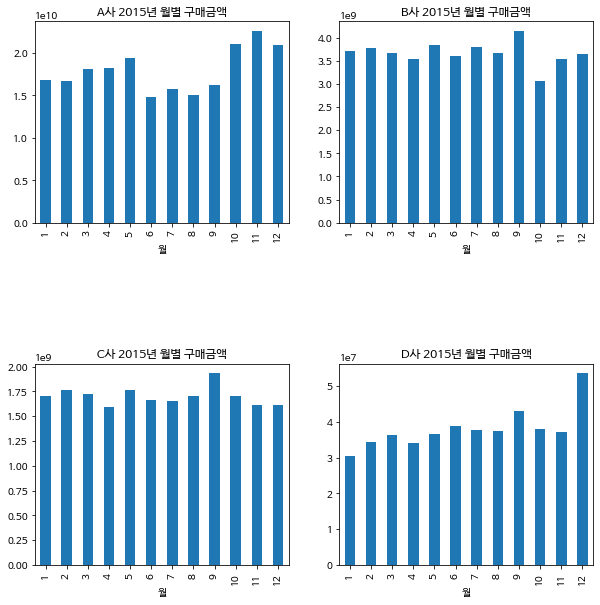

In [ ]:
# 여성 2년간 분기별 계열사별 판매량
fig, axs = plt.subplots(figsize=(10,10), nrows=2, ncols=2)
plt.subplots_adjust(hspace=0.7,wspace=0.2)

for num, i in enumerate(brand):
  row = int(num/2); col = num%2
  i = i.query('년==2015')
  i.groupby('월')['구매금액'].sum().plot(kind='bar', ax=axs[row][col], title='{}사 2015년 월별 구매금액'.format(i['제휴사'].unique()[0]))

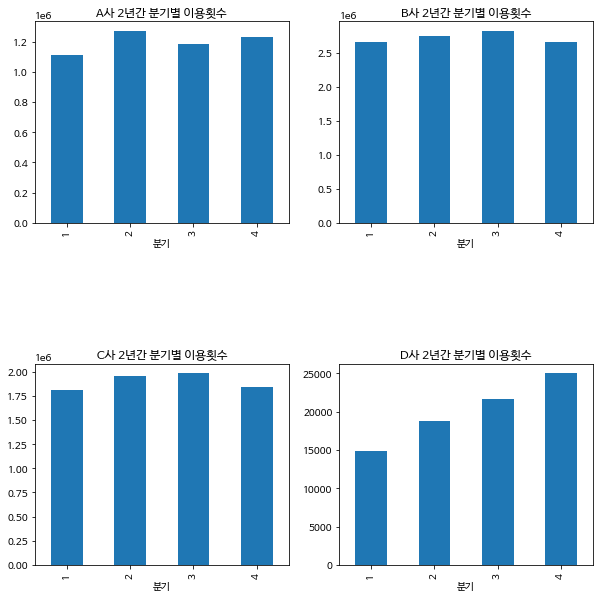

In [ ]:
# 여성 2년간 분기별 계열사별 이용횟수
fig, axs = plt.subplots(figsize=(10,10), nrows=2, ncols=2)
plt.subplots_adjust(hspace=0.7,wspace=0.2)

for num, i in enumerate(brand):
  row = int(num/2); col = num%2
  i.groupby('분기')['영수증번호'].count().plot(kind='bar', ax=axs[row][col], title='{}사 2년간 분기별 이용횟수'.format(i['제휴사'].unique()[0]))

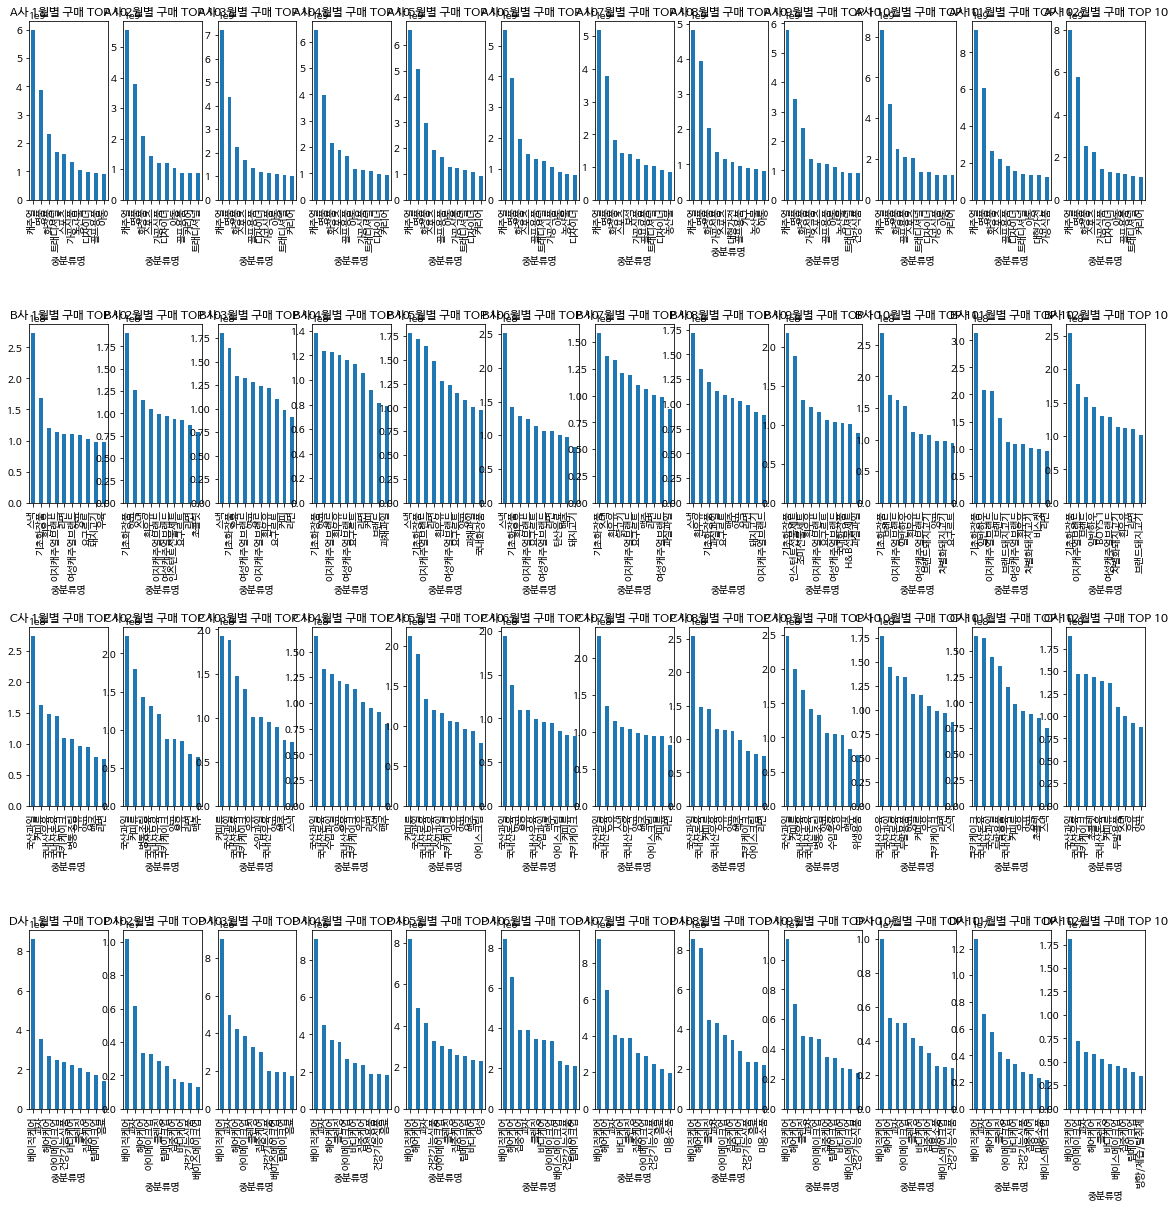

In [ ]:
# 여성 2년간 월별 계열사별 판매 top 10
seasons = [1,2,3,4,5,6,7,8,9,10,11,12]
fig, axs = plt.subplots(figsize=(20,20), nrows=4, ncols=12)
plt.subplots_adjust(hspace=0.7,wspace=0.2)

for num1,i in enumerate(brand):
    row = num1
    for num2, season in enumerate(seasons):
        col = num2
        i.query(f'월=={season}').groupby('중분류명')['구매금액'].sum().sort_values(ascending=False)[:10].plot(kind='bar', ax=axs[row][col],
                            title='{}사 {}월별 구매 TOP 10'.format(i['제휴사'].unique()[0], season))

In [ ]:
# 여성 2년간 분기별 계열사별 판매 top 10
seasons = [1,2,3,4]
fig, axs = plt.subplots(figsize=(20,20), nrows=4, ncols=4)
plt.subplots_adjust(hspace=0.7,wspace=0.2)

for num1,i in enumerate(brand):
    row = num1
    for num2, season in enumerate(seasons):
        col = num2
        i.query(f'분기=={season}')['중분류명'].value_counts()[:10].plot(kind='bar', ax=axs[row][col],
                            title='여성 {}사 2년간 {}분기 구매 TOP 10'.format(i['제휴사'].unique()[0], season))

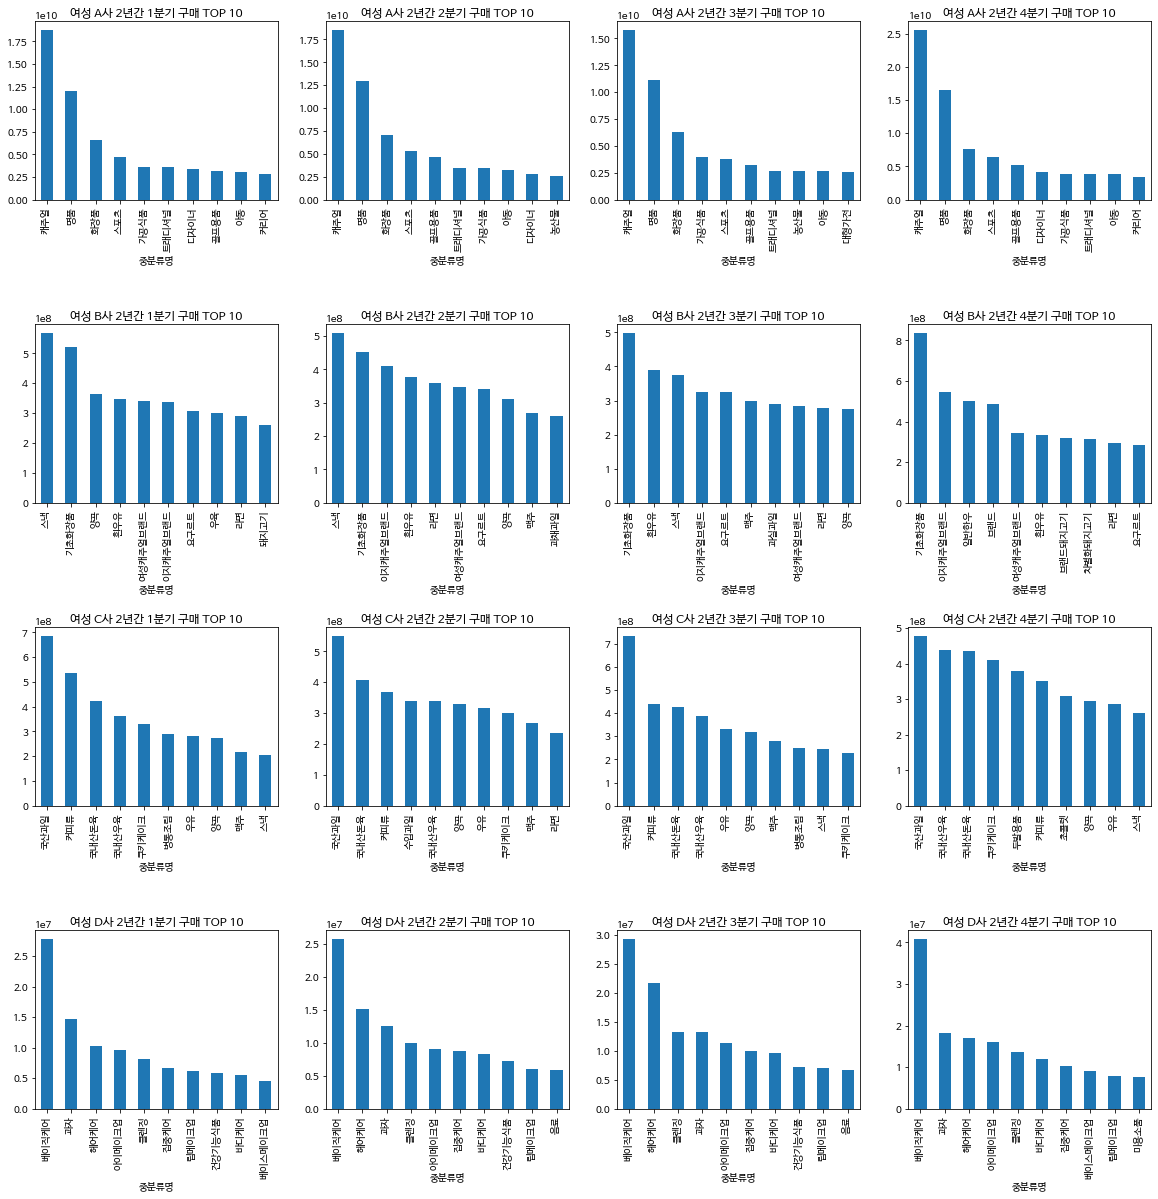

In [ ]:
# 여성 계열사별 분기별 총구매액 높은순 탑 10
seasons = [1,2,3,4]
fig, axs = plt.subplots(figsize=(20,20), nrows=4, ncols=4)
plt.subplots_adjust(hspace=0.7,wspace=0.2)

for num1,i in enumerate(brand):
    row = num1
    for num2, season in enumerate(seasons):
        col = num2
        i.query(f'분기=={season}').groupby('중분류명')['구매금액'].sum().sort_values(ascending=False)[:10].plot(kind='bar', ax=axs[row][col],
                            title='여성 {}사 2년간 {}분기 구매 TOP 10'.format(i['제휴사'].unique()[0], season))

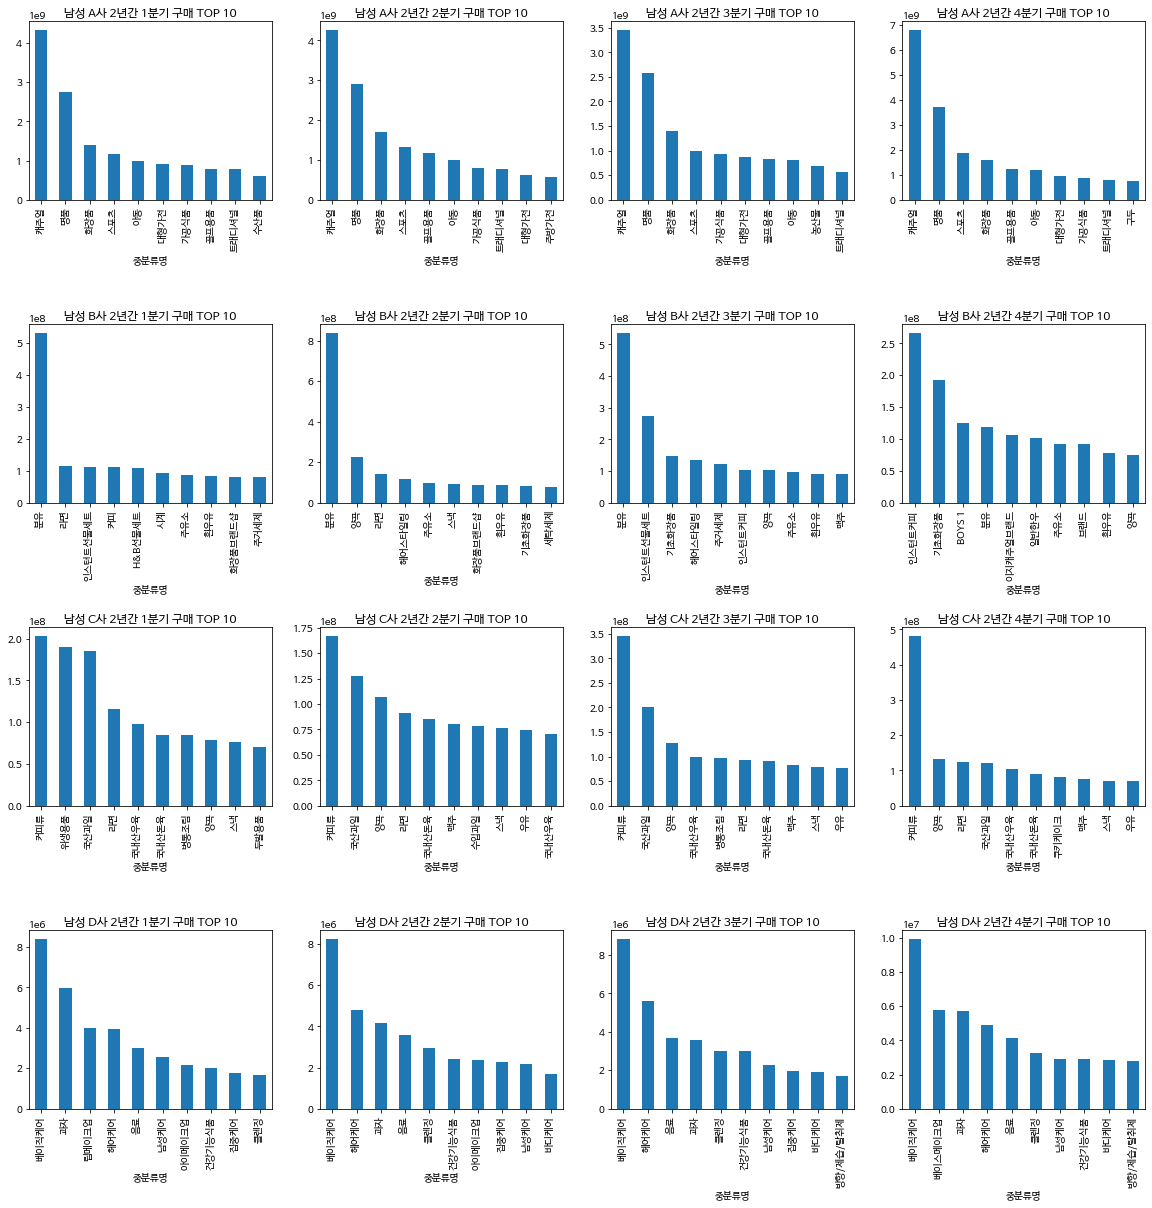

In [ ]:
# 남성 계열사별 분기별 총구매액 높은순 탑 10
seasons = [1,2,3,4]
fig, axs = plt.subplots(figsize=(20,20), nrows=4, ncols=4)
plt.subplots_adjust(hspace=0.7,wspace=0.2)

for num1,i in enumerate(brand_m):
    row = num1
    for num2, season in enumerate(seasons):
        col = num2
        i.query(f'분기=={season}').groupby('중분류명')['구매금액'].sum().sort_values(ascending=False)[:10].plot(kind='bar', ax=axs[row][col],
                            title='남성 {}사 2년간 {}분기 구매 TOP 10'.format(i['제휴사'].unique()[0], season))

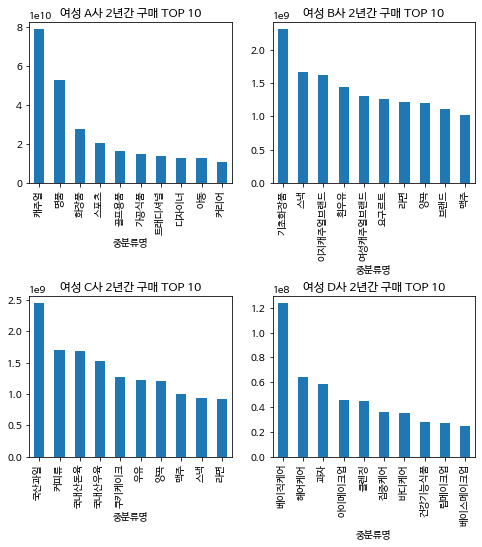

In [ ]:
# 여성 계열사별 구매금액 탑10
seasons = [1,2,3,4]
fig, axs = plt.subplots(figsize=(8,8), nrows=2, ncols=2)
plt.subplots_adjust(hspace=0.7,wspace=0.2)

for num1,i in enumerate(brand):
    row = int(num1/2)
    col = num1%2
    i.groupby('중분류명')['구매금액'].sum().sort_values(ascending=False)[:10].plot(kind='bar', ax=axs[row][col],
                            title='여성 {}사 2년간 구매 TOP 10'.format(i['제휴사'].unique()[0], ))


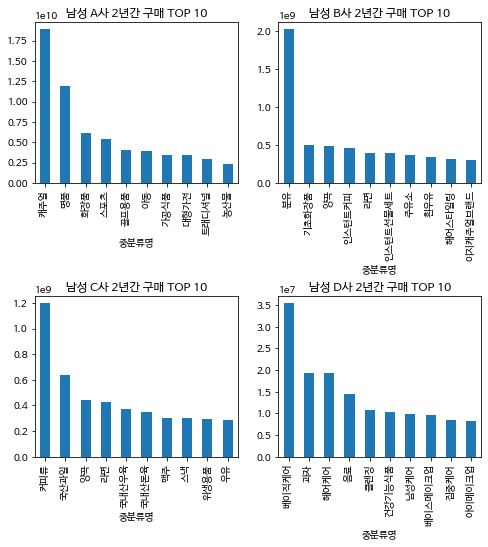

In [ ]:
# 여성 계열사별 구매금액 탑10
seasons = [1,2,3,4]
fig, axs = plt.subplots(figsize=(8,8), nrows=2, ncols=2)
plt.subplots_adjust(hspace=0.7,wspace=0.2)

for num1,i in enumerate(brand_m):
    row = int(num1/2)
    col = num1%2
    i.groupby('중분류명')['구매금액'].sum().sort_values(ascending=False)[:10].plot(kind='bar', ax=axs[row][col],
                            title='남성 {}사 2년간 구매 TOP 10'.format(i['제휴사'].unique()[0], ))


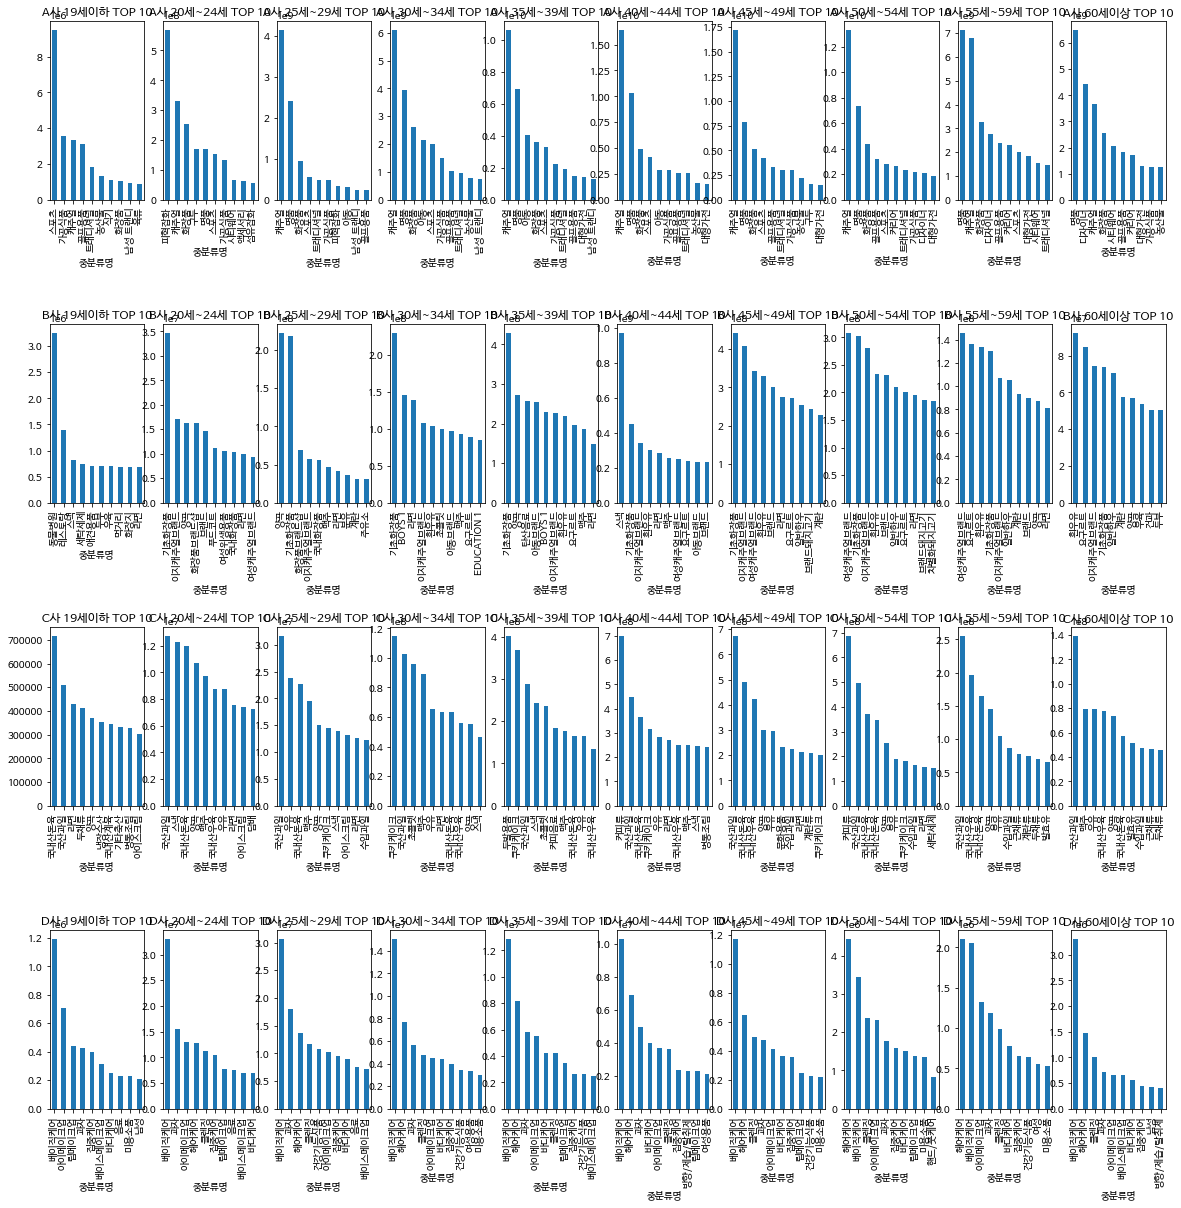

In [ ]:
# 여성 연령대별 총구매액 높은순 탑 10
seasons = [1,2,3,4]
Age = ['19세이하','20세~24세', '25세~29세','30세~34세','35세~39세','40세~44세','45세~49세','50세~54세','55세~59세','60세이상']
fig, axs = plt.subplots(figsize=(20,20), nrows=4, ncols=10)
plt.subplots_adjust(hspace=0.7,wspace=0.2)

for num1,i in enumerate(brand):
    row = bnum1
    for num2, age in enumerate(Age):
        col = num2
        i.query(f'연령대=="{age}"').groupby('중분류명')['구매금액'].sum().sort_values(ascending=False)[:10].plot(kind='bar', ax=axs[row][col],
                            title='{}사 {} TOP 10'.format(i['제휴사'].unique()[0], age))
      

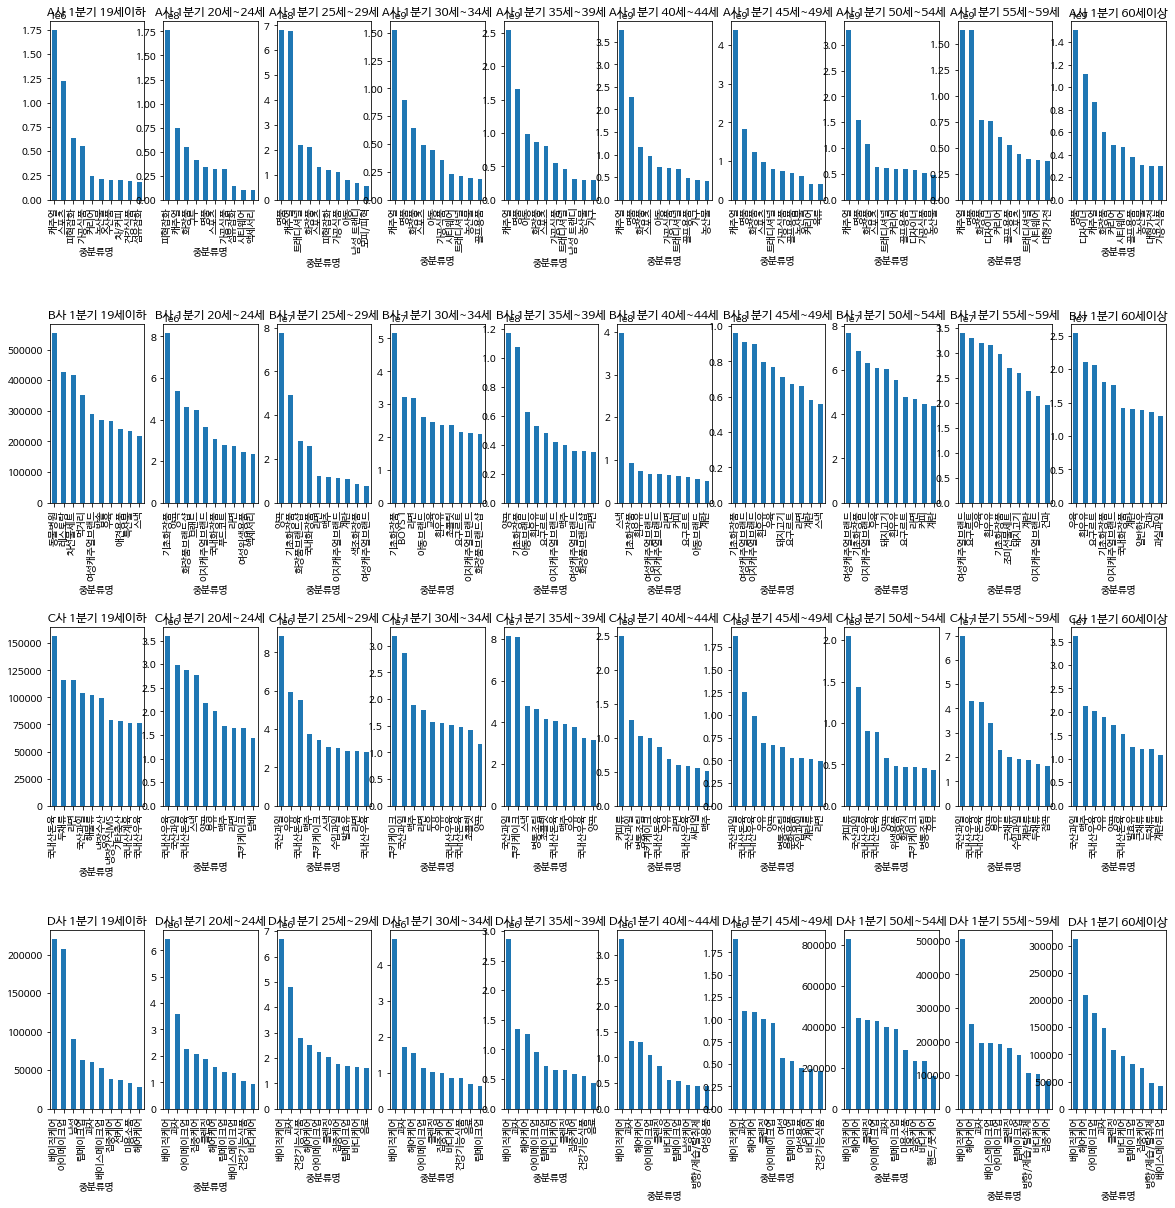

In [ ]:
# 여성 연령대별 분기별 총구매액 높은순 탑 10 -1분기
seasons = [1,2,3,4]
Age = ['19세이하','20세~24세', '25세~29세','30세~34세','35세~39세','40세~44세','45세~49세','50세~54세','55세~59세','60세이상']
fig, axs = plt.subplots(figsize=(20,20), nrows=4, ncols=10)
plt.subplots_adjust(hspace=0.7,wspace=0.2)

for num1,i in enumerate(brand):
    row = num1
    for num2, age in enumerate(Age):
        col = num2
        i.query(f'연령대=="{age}"&분기==1').groupby('중분류명')['구매금액'].sum().sort_values(ascending=False)[:10].plot(kind='bar', ax=axs[row][col],
                            title='{}사 1분기 {}'.format(i['제휴사'].unique()[0], age))

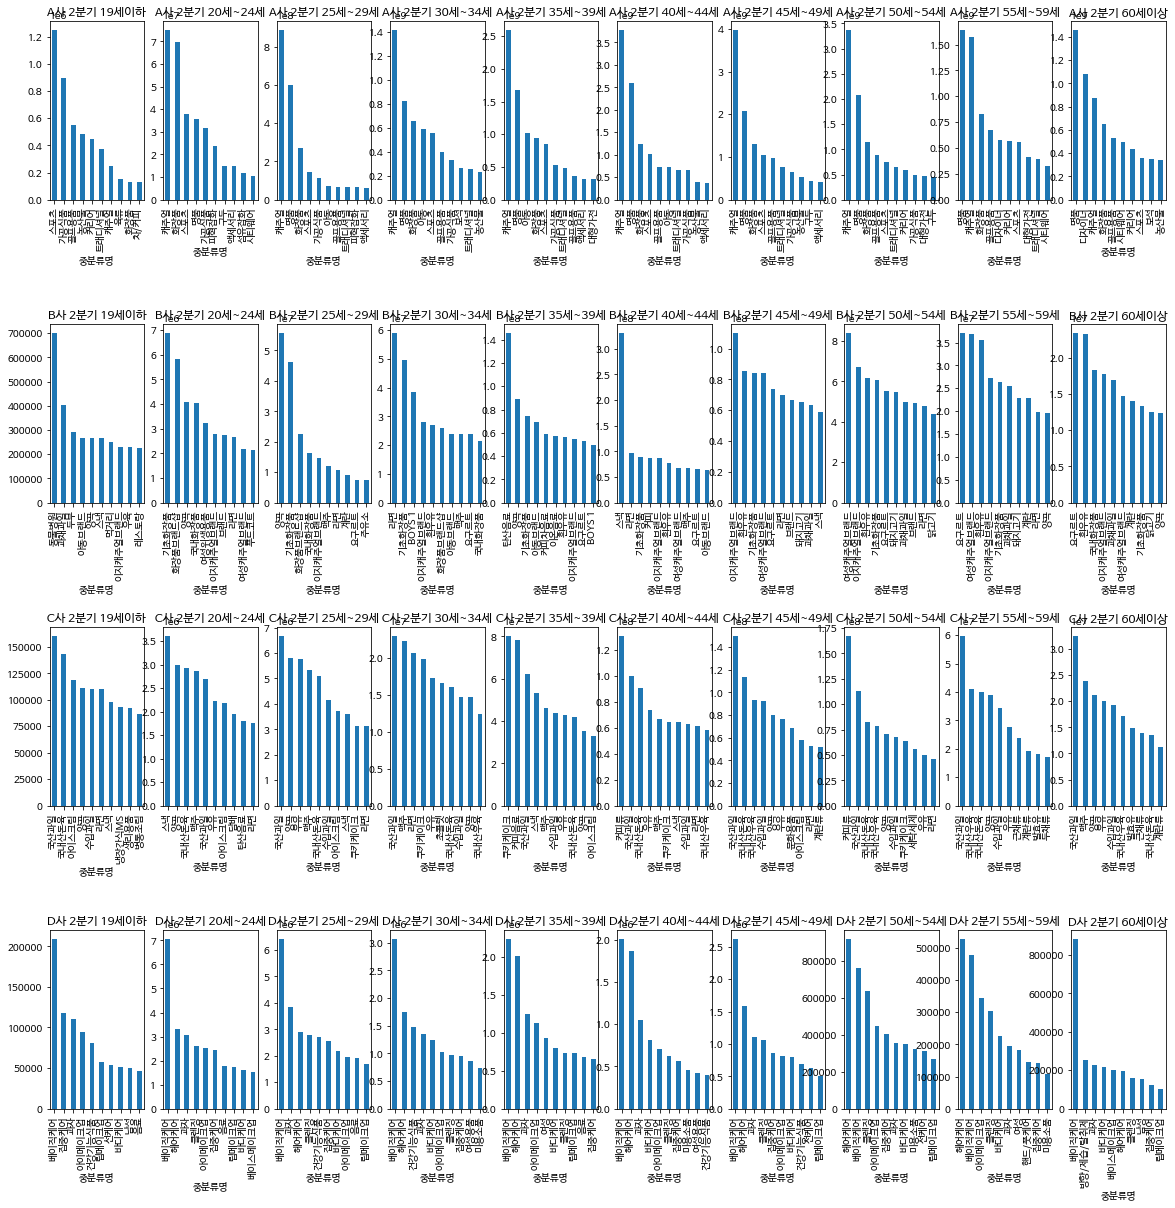

In [ ]:
# 여성 연령대별 분기별 총구매액 높은순 탑 10 - 2분기
seasons = [1,2,3,4]
Age = ['19세이하','20세~24세', '25세~29세','30세~34세','35세~39세','40세~44세','45세~49세','50세~54세','55세~59세','60세이상']
fig, axs = plt.subplots(figsize=(20,20), nrows=4, ncols=10)
plt.subplots_adjust(hspace=0.7,wspace=0.2)

for num1,i in enumerate(brand):
    row = num1
    for num2, age in enumerate(Age):
        col = num2
        i.query(f'연령대=="{age}"&분기==2').groupby('중분류명')['구매금액'].sum().sort_values(ascending=False)[:10].plot(kind='bar', ax=axs[row][col],
                            title='{}사 2분기 {}'.format(i['제휴사'].unique()[0], age))

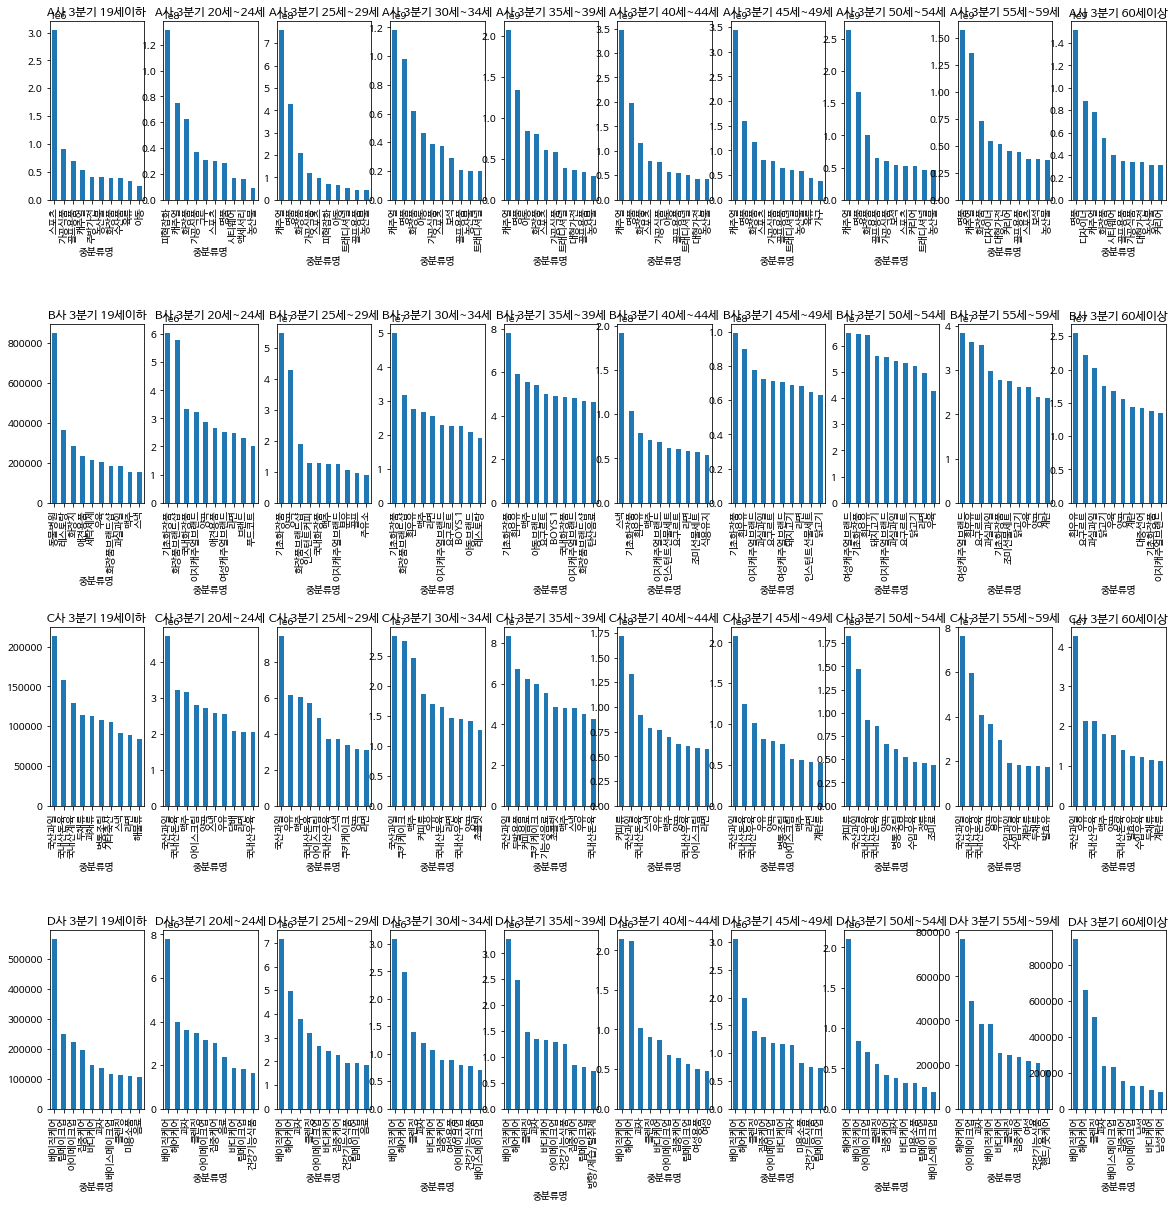

In [ ]:
# 여성 연령대별 분기별 총구매액 높은순 탑 10 -3분기
seasons = [1,2,3,4]
Age = ['19세이하','20세~24세', '25세~29세','30세~34세','35세~39세','40세~44세','45세~49세','50세~54세','55세~59세','60세이상']
fig, axs = plt.subplots(figsize=(20,20), nrows=4, ncols=10)
plt.subplots_adjust(hspace=0.7,wspace=0.2)

for num1,i in enumerate(brand):
    row = num1
    for num2, age in enumerate(Age):
        col = num2
        i.query(f'연령대=="{age}"&분기==3').groupby('중분류명')['구매금액'].sum().sort_values(ascending=False)[:10].plot(kind='bar', ax=axs[row][col],
                            title='{}사 3분기 {}'.format(i['제휴사'].unique()[0], age))

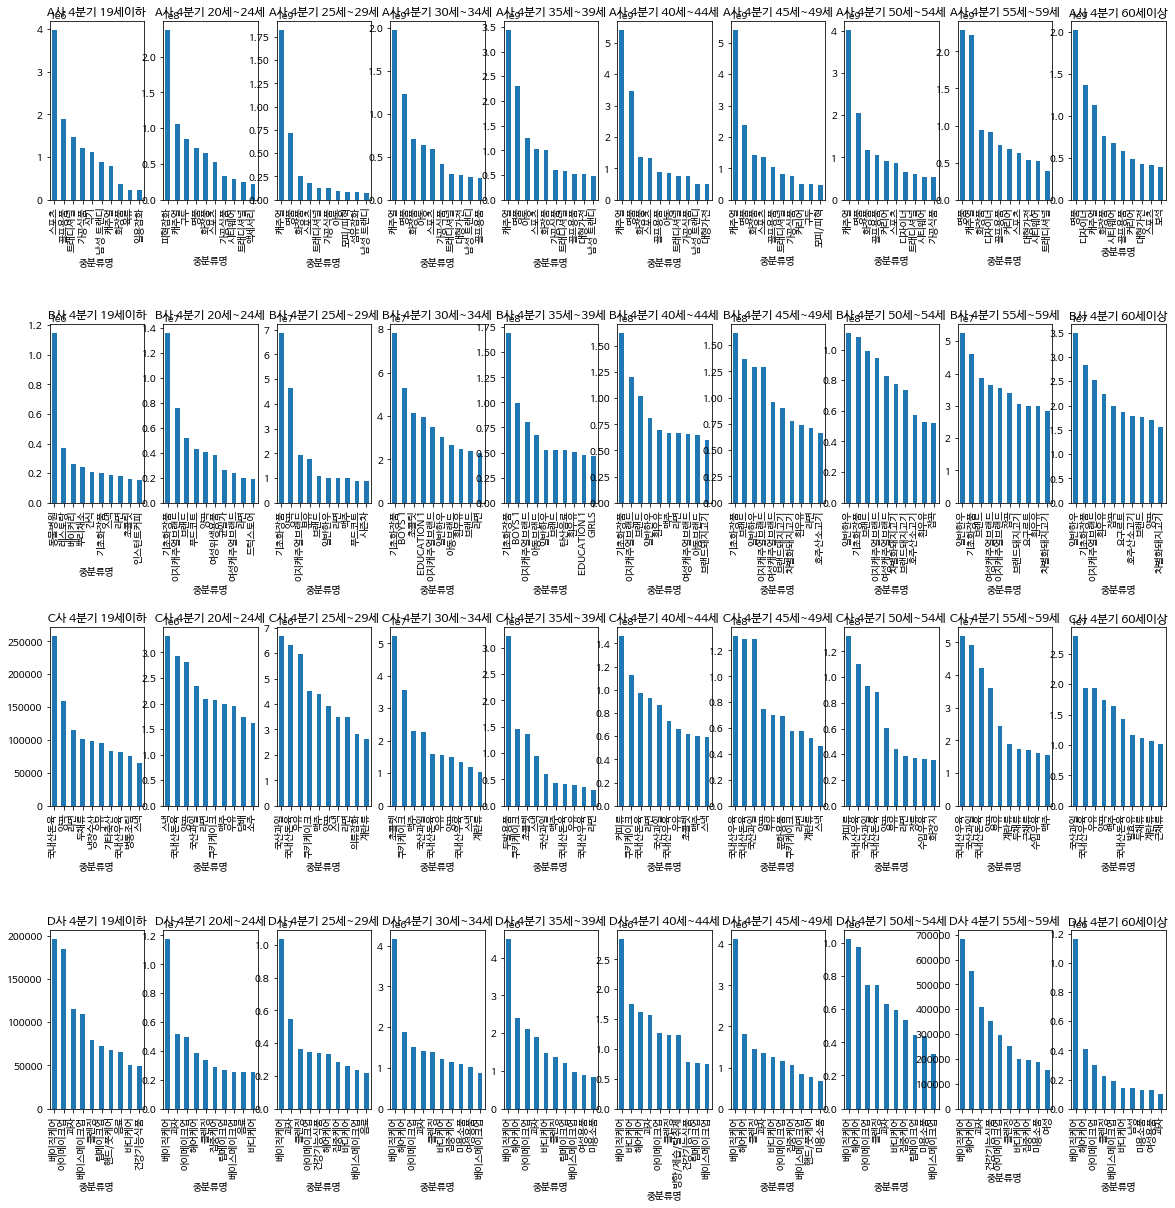

In [ ]:
# 여성 연령대별 분기별 총구매액 높은순 탑 10 -4분기
seasons = [1,2,3,4]
Age = ['19세이하','20세~24세', '25세~29세','30세~34세','35세~39세','40세~44세','45세~49세','50세~54세','55세~59세','60세이상']
fig, axs = plt.subplots(figsize=(20,20), nrows=4, ncols=10)
plt.subplots_adjust(hspace=0.7,wspace=0.2)

for num1,i in enumerate(brand):
    row = num1
    for num2, age in enumerate(Age):
        col = num2
        i.query(f'연령대=="{age}"&분기==4').groupby('중분류명')['구매금액'].sum().sort_values(ascending=False)[:10].plot(kind='bar', ax=axs[row][col],
                            title='{}사 4분기 {}'.format(i['제휴사'].unique()[0], age))

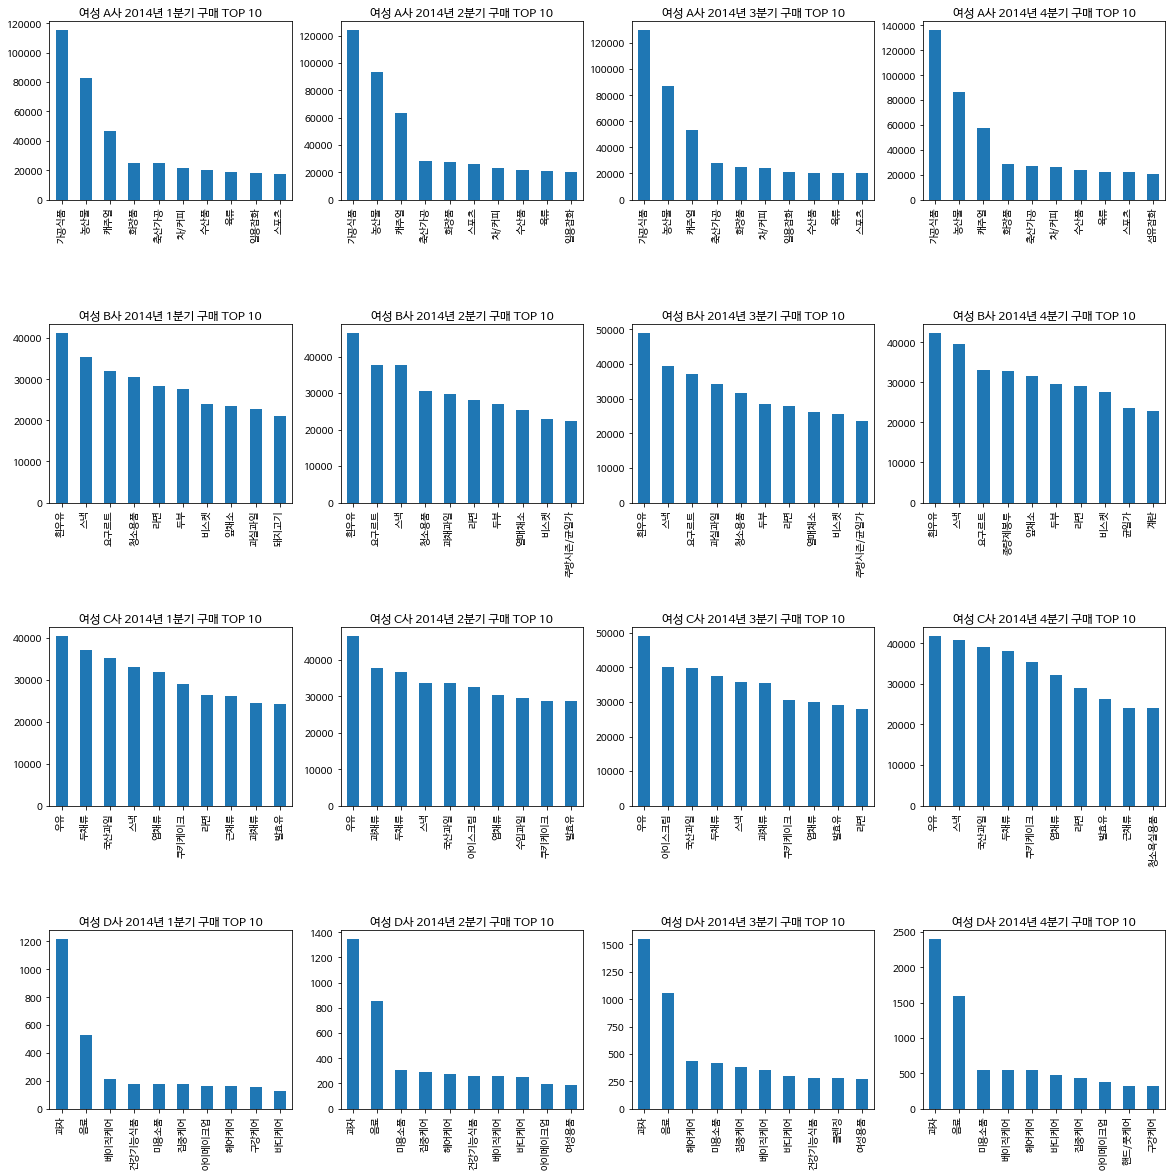

In [ ]:
# 여성 2014년 분기별 계열사별 판매 top 10
seasons = [1,2,3,4]
fig, axs = plt.subplots(figsize=(20,20), nrows=4, ncols=4)
plt.subplots_adjust(hspace=0.7,wspace=0.2)

for num1,i in enumerate(brand):
    row = num1
    for num2, season in enumerate(seasons):
        col = num2
        i = i.query('년==2014')
        i.query(f'분기=={season}')['중분류명'].value_counts()[:10].plot(kind='bar', ax=axs[row][col],
                            title='여성 {}사 2014년 {}분기 구매 TOP 10'.format(i['제휴사'].unique()[0], season))

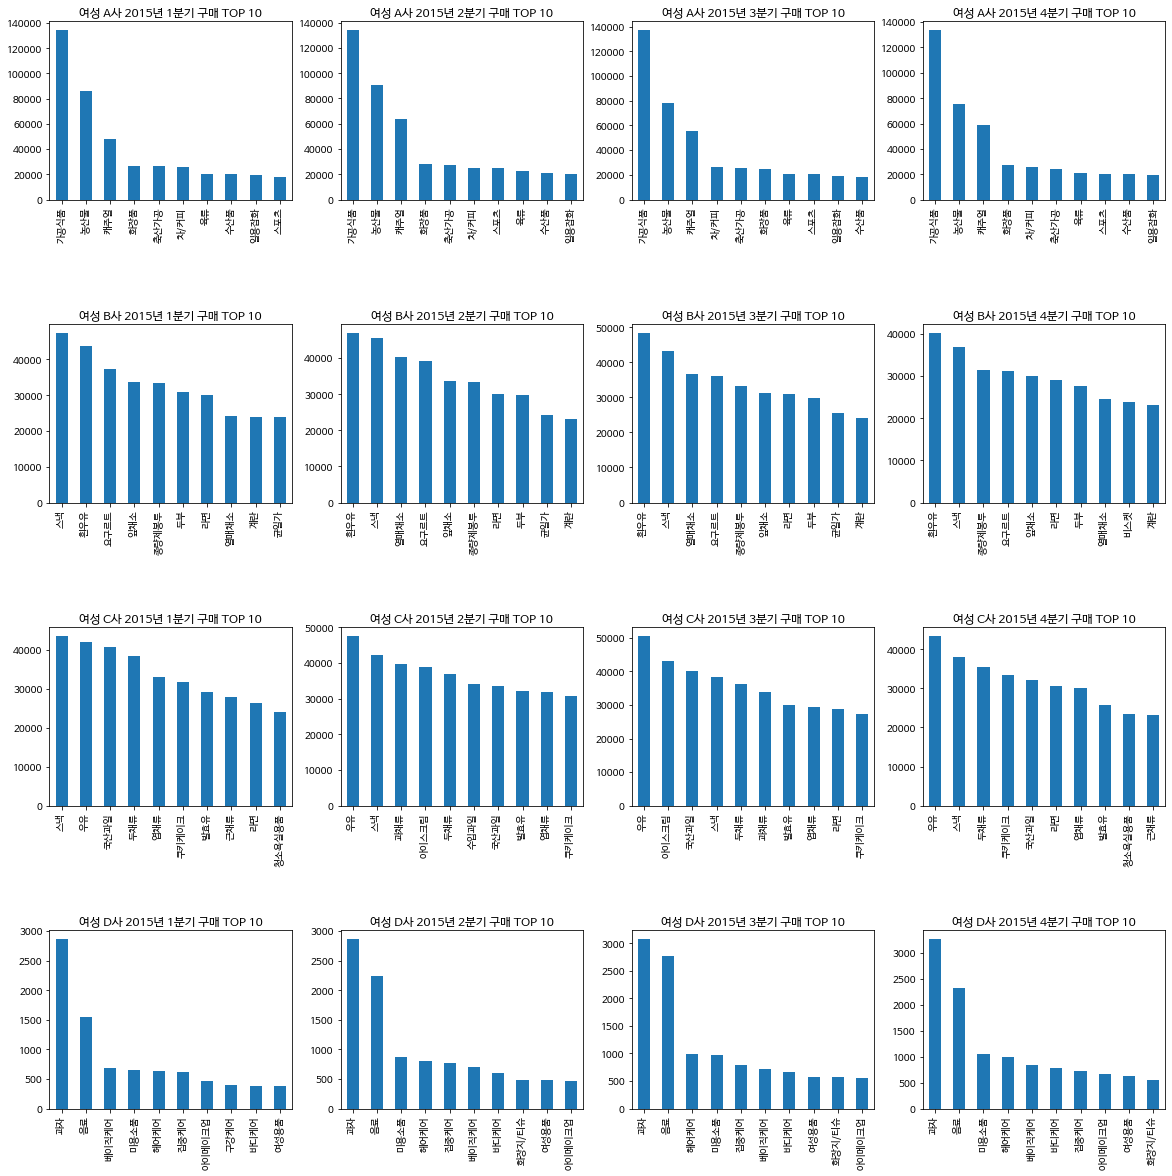

In [ ]:
# 여성 2015년 분기별 계열사별 판매 top 10
seasons = [1,2,3,4]
fig, axs = plt.subplots(figsize=(20,20), nrows=4, ncols=4)
plt.subplots_adjust(hspace=0.7,wspace=0.2)

for num1,i in enumerate(brand):
    row = num1
    for num2, season in enumerate(seasons):
        col = num2
        i = i.query('년==2015')
        i.query(f'분기=={season}')['중분류명'].value_counts()[:10].plot(kind='bar', ax=axs[row][col],
                            title='여성 {}사 2015년 {}분기 구매 TOP 10'.format(i['제휴사'].unique()[0], season))

In [ ]:
fa1 = data_f.query('제휴사=="A"').groupby('중분류명')['구매금액'].sum().sort_values(ascending=False)[:10].plot(kind='bar')
# fa1.rename(columns={'구매금액':'구매합계'}, inplace=True)
fa2 = data_f.query('제휴사=="A"').groupby('중분류명')['구매금액'].max().sort_values(ascending=False)[:10]
# fa2.rename(columns={'구매금액':'구매최고액'},inplace=True)
fa = pd.concat([fa1, fa2], axis=1)

fa

,구매금액,구매금액
캐주얼,7.862601e+10,69046650.0
명품,5.267463e+10,87769260.0
화장품,2.771409e+10,NaN
스포츠,2.033431e+10,37800000.0
골프용품,1.616939e+10,NaN
가공식품,1.498664e+10,NaN
트래디셔널,1.368343e+10,93166350.0
디자이너,1.290710e+10,38442200.0
아동,1.280140e+10,NaN
커리어,1.083510e+10,NaN


In [ ]:
data_f.query('제휴사=="B"').groupby('중분류명')['구매금액'].sum().sort_values(ascending=False)[:10]

중분류명
기초화장품       2309330520
스낵          1664421980
이지캐주얼브랜드    1620197460
흰우유         1446506726
여성캐주얼브랜드    1314578400
요구르트        1256786861
라면          1221134839
양곡          1202766224
브랜드         1117979580
맥주          1020047990
Name: 구매금액, dtype: int64

In [ ]:
data_f.query('제휴사=="C"').groupby('중분류명')['구매금액'].sum().sort_values(ascending=False)[:10]

중분류명
국산과일     2446496570
커피류      1693607475
국내산돈육    1690305991
국내산우육    1529292885
쿠키케이크    1266021316
우유       1218582482
양곡       1210288388
맥주        999470176
스낵        939614193
라면        917940619
Name: 구매금액, dtype: int64

In [ ]:
data_f.query('제휴사=="D"').groupby('중분류명')['구매금액'].sum().sort_values(ascending=False)[:10]

중분류명
베이직케어      123633480
헤어케어        63890775
과자          58605390
아이메이크업      45941120
클렌징         45041810
집중케어        35612730
바디케어        35150390
건강기능식품      27696040
립메이크업       27158420
베이스메이크업     24895700
Name: 구매금액, dtype: int64

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)
AA = A.groupby(['년','분기','구매시간대'])['영수증번호'].count().to_frame()
AB = A.groupby(['년','월','주차','구매시간대'])['영수증번호'].count().to_frame()

display(AA, AB)

영수증번호
년    분기 구매시간대        
2014 1  밤         997
        새벽&오전    6538
        오후     388976
        저녁     138732
     2  밤        1273
        새벽&오전    8342
        오후     454983
        저녁     163134
     3  밤        1241
        새벽&오전    7983
        오후     430682
        저녁     151812
     4  밤        1474
        새벽&오전    8214
        오후     462430
        저녁     157742
2015 1  밤        1269
        새벽&오전    7653
        오후     424221
        저녁     146545
     2  밤        1535
        새벽&오전    9615
        오후     466023
        저녁     166705
     3  밤        1540
        새벽&오전    8781
        오후     428268
        저녁     152871
     4  밤        1474
        새벽&오전    8676
        오후     442856
        저녁     147991

영수증번호
년    월  주차 구매시간대       
2014 1  1  밤         70
           새벽&오전    615
           오후     30881
           저녁     10236
        2  밤         72
           새벽&오전    515
           오후     30433
           저녁     10874
        3  밤         90
           새벽&오전    506
           오후     31363
           저녁     10999
        4  밤        114
           새벽&오전    743
           오후     38683
           저녁     13680
     2  1  밤         77
           새벽&오전    359
           오후     24466
           저녁      8026
        2  밤         70
           새벽&오전    469
           오후     31795
           저녁     11180
        3  밤         51
           새벽&오전    439
           오후     28832
           저녁     10062
        4  밤         89
           새벽&오전    436
           오후     30903
           저녁     11630
     3  1  밤         76
           새벽&오전    540
           오후     33381
           저녁     12340
        2  밤         79
           새벽&오전    558
           오후     30250
           저녁     10880
        3  밤         67
           새벽&오전    521
           오후     31100
           저녁     11576
        4  밤        142
           새벽&오전    837
           오후     46889
           저녁     17249
     4  1  밤         98
           새벽&오전    731
           오후     37592
           저녁     13467
        2  밤        122
           새벽&오전    574
           오후     37104
           저녁     12799
        3  밤         58
           새벽&오전    569
           오후     29629
           저녁     11206
        4  밤        116
           새벽&오전    719
           오후     44150
           저녁     14658
     5  1  밤        128
           새벽&오전    662
           오후     36696
           저녁     13934
        2  밤         74
           새벽&오전    614
           오후     35648
           저녁     12697
        3  밤        107
           새벽&오전    621
           오후     34435
           저녁     12637
        4  밤        157
           새벽&오전    937
           오후     49739
           저녁     18444
     6  1  밤        128
           새벽&오전    631
           오후     35640
           저녁     12898
        2  밤         77
           새벽&오전    603
           오후     32599
           저녁     11643
        3  밤         71
           새벽&오전    709
           오후     34527
           저녁     11892
        4  밤        137
           새벽&오전    972
           오후     47224
           저녁     16859
     7  1  밤         96
           새벽&오전    785
           오후     37246
           저녁     12983
        2  밤         99
           새벽&오전    682
           오후     36578
           저녁     13122
        3  밤        110
           새벽&오전    578
           오후     35548
           저녁     13021
        4  밤        141
           새벽&오전    891
           오후     44375
           저녁     16653
     8  1  밤         73
           새벽&오전    484
           오후     27644
           저녁     10498
        2  밤         86
           새벽&오전    622
           오후     35150
           저녁     12033
        3  밤         66
           새벽&오전    616
           오후     30799
           저녁     10723
        4  밤        173
           새벽&오전    970
           오후     48671
           저녁     17068
     9  1  밤         99
           새벽&오전    609
           오후     31869
           저녁     11234
        2  밤        113
           새벽&오전    572
           오후     32363
           저녁     10709
        3  밤         94
           새벽&오전    535
           오후     31825
           저녁     11003
        4  밤         91
           새벽&오전    639
           오후     38614
           저녁     12765
     10 1  밤        112
           새벽&오전    706
           오후     38173
           저녁     12974
        2  밤         95
           새벽&오전    680
           오후     35410
           저녁     12511
        3  밤         77
           새벽&오전    508
           오후     29774
           저녁     10667
        4  밤        129
           새벽&오전    932
           오후     47892
           저녁     15679
     11 1  밤         97
           새벽&오전    748
           오후     37877
           저녁     12444
        2  밤        121
          

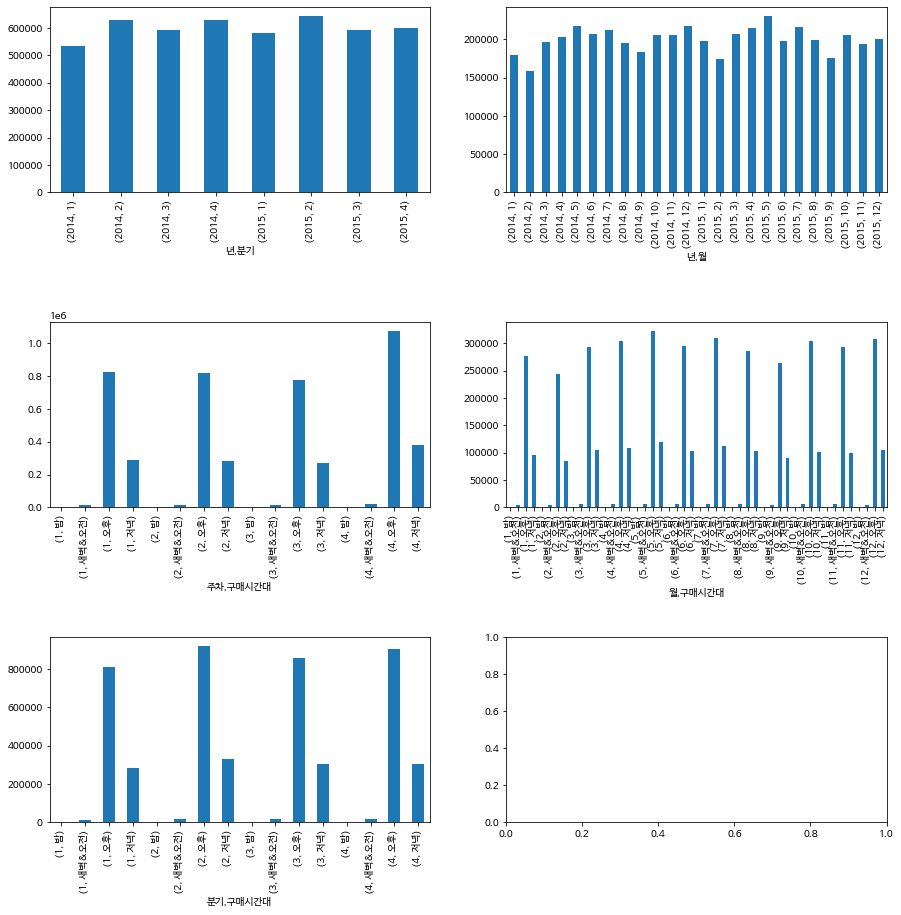

In [ ]:
fig, axs = plt.subplots(figsize=(15,15), nrows=3, ncols=2)
plt.subplots_adjust(hspace=0.7,wspace=0.2)

A.groupby(['년','분기'])['영수증번호'].count().plot(kind='bar',ax=axs[0,0])
A.groupby(['년','월'])['영수증번호'].count().plot(kind='bar',ax=axs[0,1] )
A.groupby(['주차','구매시간대'])['영수증번호'].count().plot(kind='bar',ax=axs[1,0] )
A.groupby(['월','구매시간대'])['영수증번호'].count().plot(kind='bar',ax=axs[1,1] )
A.groupby(['분기','구매시간대'])['영수증번호'].count().plot(kind='bar',ax=axs[2,0] )

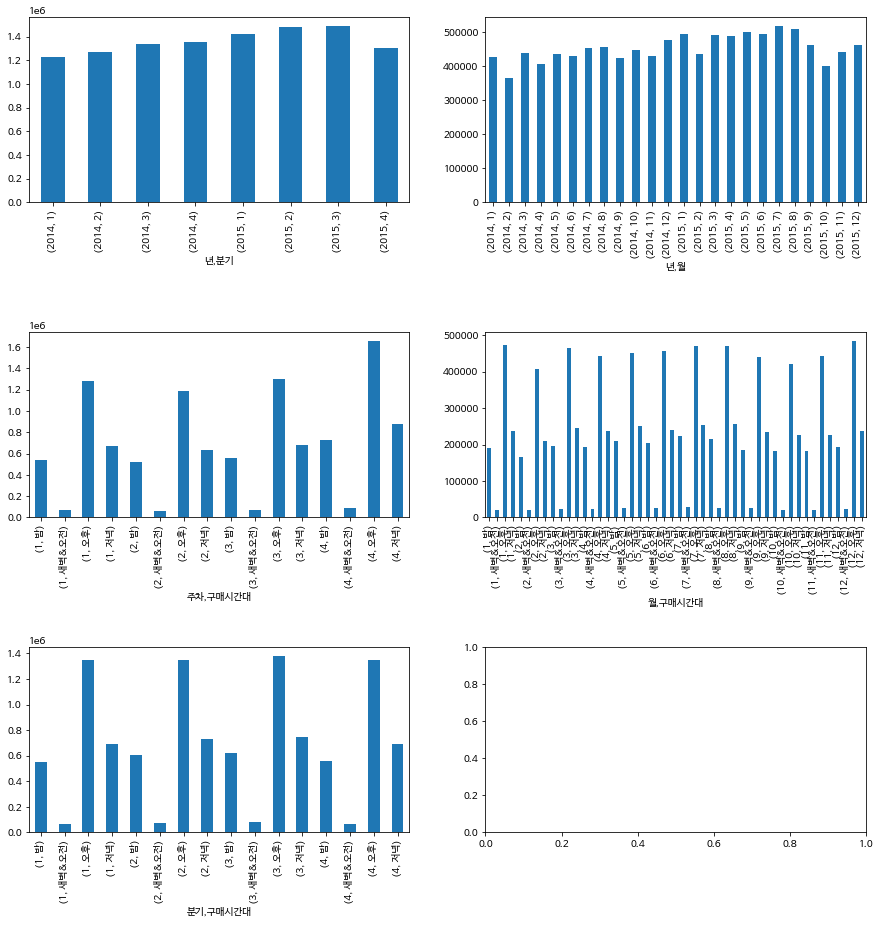

In [ ]:
fig, axs = plt.subplots(figsize=(15,15), nrows=3, ncols=2)
plt.subplots_adjust(hspace=0.7,wspace=0.2)

B.groupby(['년','분기'])['영수증번호'].count().plot(kind='bar',ax=axs[0,0])
B.groupby(['년','월'])['영수증번호'].count().plot(kind='bar',ax=axs[0,1] )
B.groupby(['주차','구매시간대'])['영수증번호'].count().plot(kind='bar',ax=axs[1,0] )
B.groupby(['월','구매시간대'])['영수증번호'].count().plot(kind='bar',ax=axs[1,1] )
B.groupby(['분기','구매시간대'])['영수증번호'].count().plot(kind='bar',ax=axs[2,0] )

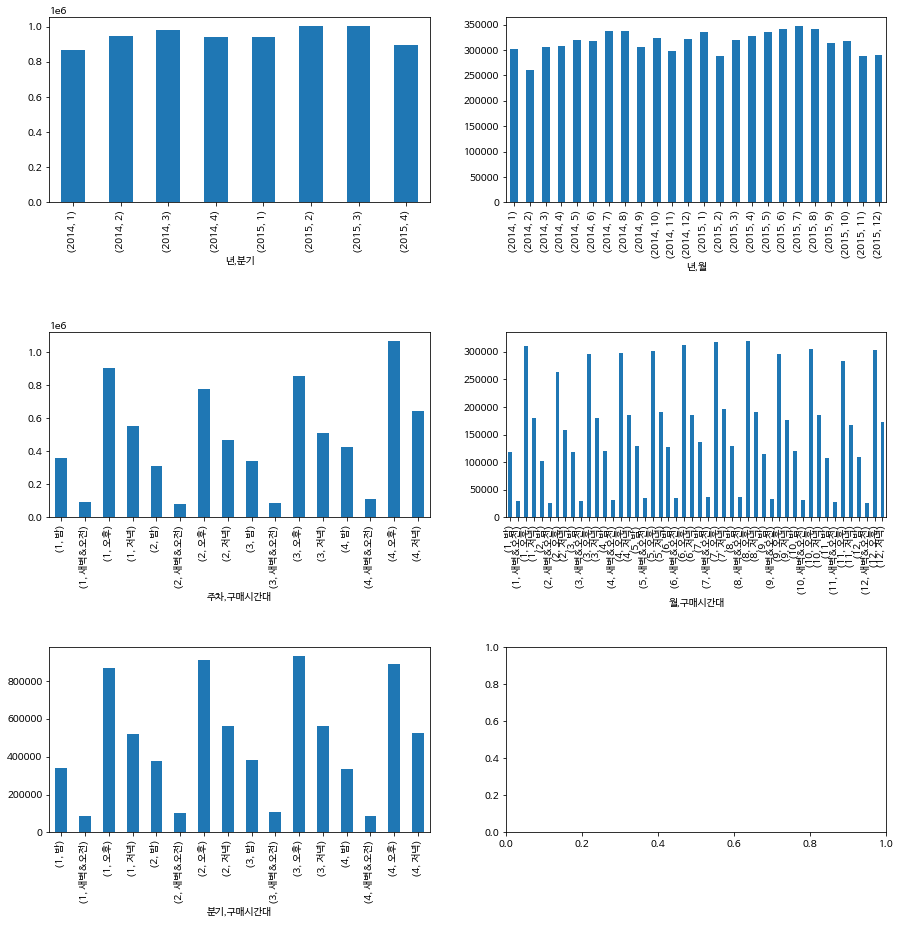

In [ ]:
fig, axs = plt.subplots(figsize=(15,15), nrows=3, ncols=2)
plt.subplots_adjust(hspace=0.7,wspace=0.2)

C.groupby(['년','분기'])['영수증번호'].count().plot(kind='bar',ax=axs[0,0])
C.groupby(['년','월'])['영수증번호'].count().plot(kind='bar',ax=axs[0,1] )
C.groupby(['주차','구매시간대'])['영수증번호'].count().plot(kind='bar',ax=axs[1,0] )
C.groupby(['월','구매시간대'])['영수증번호'].count().plot(kind='bar',ax=axs[1,1] )
C.groupby(['분기','구매시간대'])['영수증번호'].count().plot(kind='bar',ax=axs[2,0] )

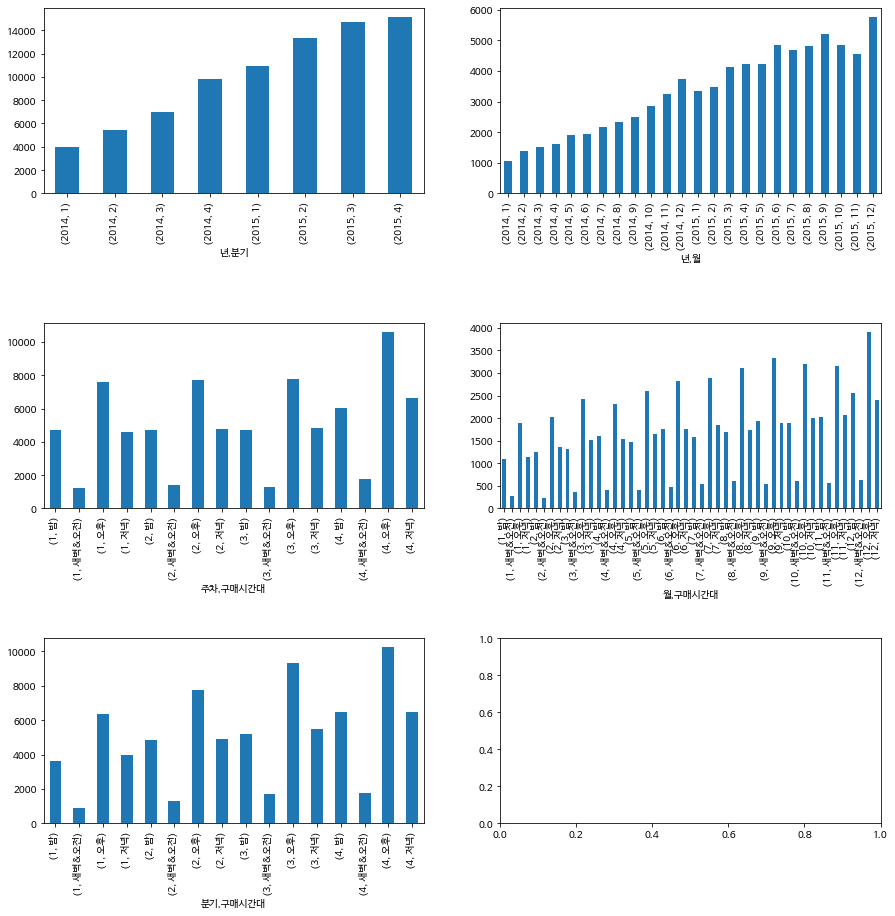

In [ ]:
fig, axs = plt.subplots(figsize=(15,15), nrows=3, ncols=2)
plt.subplots_adjust(hspace=0.7,wspace=0.2)

D.groupby(['년','분기'])['영수증번호'].count().plot(kind='bar',ax=axs[0,0])
D.groupby(['년','월'])['영수증번호'].count().plot(kind='bar',ax=axs[0,1] )
D.groupby(['주차','구매시간대'])['영수증번호'].count().plot(kind='bar',ax=axs[1,0] )
D.groupby(['월','구매시간대'])['영수증번호'].count().plot(kind='bar',ax=axs[1,1] )
D.groupby(['분기','구매시간대'])['영수증번호'].count().plot(kind='bar',ax=axs[2,0] )

## **남성**

In [ ]:
# 분기별 계열사별 판매량
data_m = data.query('성별=="M"')
data_m.head()

,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매시간,구매금액,년,월,일,분기,주차,구매시간대,성별,연령대,거주지역,분류체계,중분류명,소분류명
104,B,8664908,15,1504,B150401,15788,44,10,2420,2014,2,28,1,4,새벽&오전,M,35세~39세,100.0,식품,탄산음료,사이다
139,B,8641847,15,1504,B150401,95,43,16,1780,2014,3,17,1,3,오후,M,60세이상,100.0,식품,탄산음료,사이다
140,B,8655328,15,1504,B150401,95,43,21,1780,2015,10,30,4,4,밤,M,60세이상,100.0,식품,탄산음료,사이다
141,B,8650249,15,1504,B150401,95,43,18,980,2015,3,31,1,4,저녁,M,60세이상,100.0,식품,탄산음료,사이다
222,B,8900261,15,1504,B150401,18996,48,17,800,2014,7,21,3,3,오후,M,35세~39세,100.0,식품,탄산음료,사이다


In [ ]:
a = data_m.query('제휴사=="A"')
b = data_m.query('제휴사=="B"')
c = data_m.query('제휴사=="C"')
d = data_m.query('제휴사=="D"')

brand_m = [a,b,c,d]

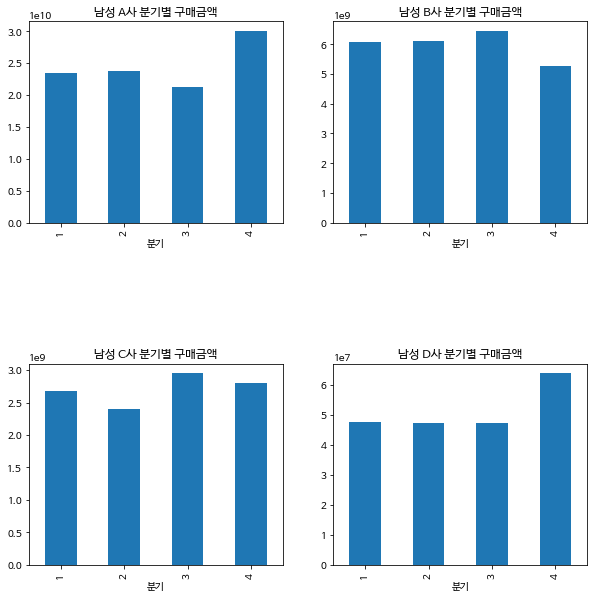

In [ ]:
# 남성 2년간 분기별 계열사별 판매량
fig, axs = plt.subplots(figsize=(10,10), nrows=2, ncols=2)
plt.subplots_adjust(hspace=0.7,wspace=0.2)

for num, i in enumerate(brand_m):
  row = int(num/2); col = num%2
  i.groupby('분기')['구매금액'].sum().plot(kind='bar', ax=axs[row][col], title='남성 {}사 분기별 구매금액'.format(i['제휴사'].unique()[0]))

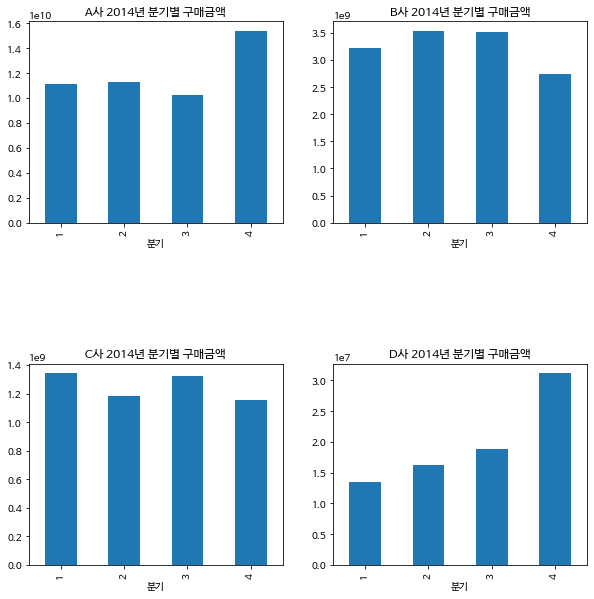

In [ ]:
# 남성 2014년 분기별 계열사별 판매량
fig, axs = plt.subplots(figsize=(10,10), nrows=2, ncols=2)
plt.subplots_adjust(hspace=0.7,wspace=0.2)

for num, i in enumerate(brand_m):
  row = int(num/2); col = num%2
  i = i.query('년==2014')
  i.groupby('분기')['구매금액'].sum().plot(kind='bar', ax=axs[row][col], title='{}사 2014년 분기별 구매금액'.format(i['제휴사'].unique()[0]))

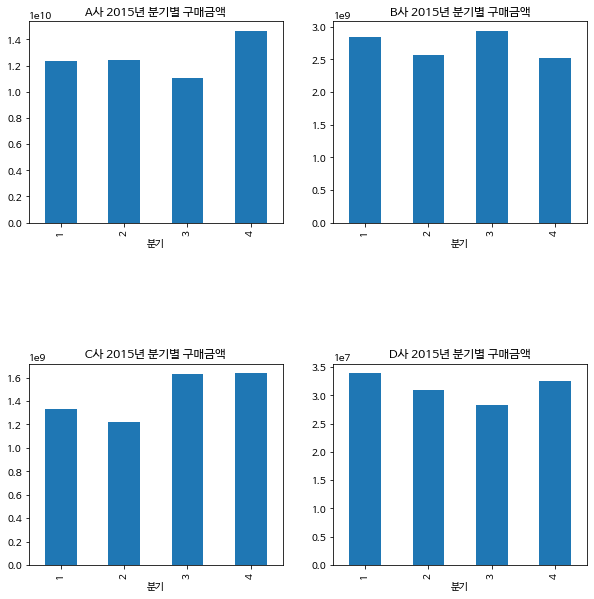

In [ ]:
# 남성 2015년 분기별 계열사별 판매량
fig, axs = plt.subplots(figsize=(10,10), nrows=2, ncols=2)
plt.subplots_adjust(hspace=0.7,wspace=0.2)

for num, i in enumerate(brand_m):
  row = int(num/2); col = num%2
  i = i.query('년==2015')
  i.groupby('분기')['구매금액'].sum().plot(kind='bar', ax=axs[row][col], title='{}사 2015년 분기별 구매금액'.format(i['제휴사'].unique()[0]))

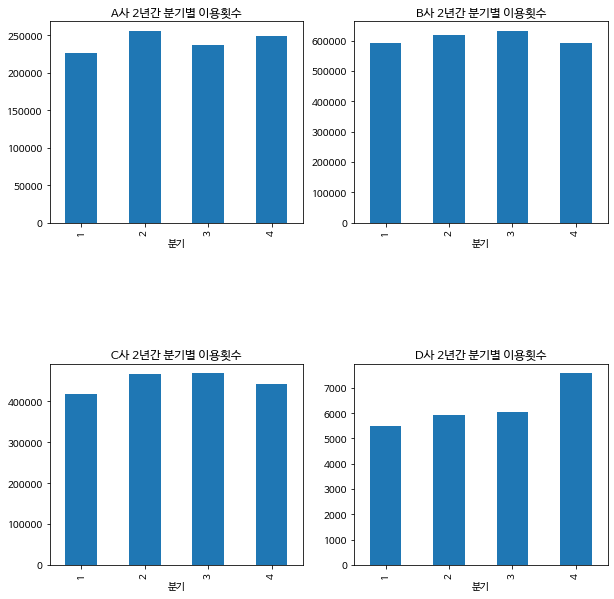

In [ ]:
# 남성 2년간 분기별 계열사별 이용횟수
fig, axs = plt.subplots(figsize=(10,10), nrows=2, ncols=2)
plt.subplots_adjust(hspace=0.7,wspace=0.2)

for num, i in enumerate(brand_m):
  row = int(num/2); col = num%2
  i.groupby('분기')['영수증번호'].count().plot(kind='bar', ax=axs[row][col], title='{}사 2년간 분기별 이용횟수'.format(i['제휴사'].unique()[0]))

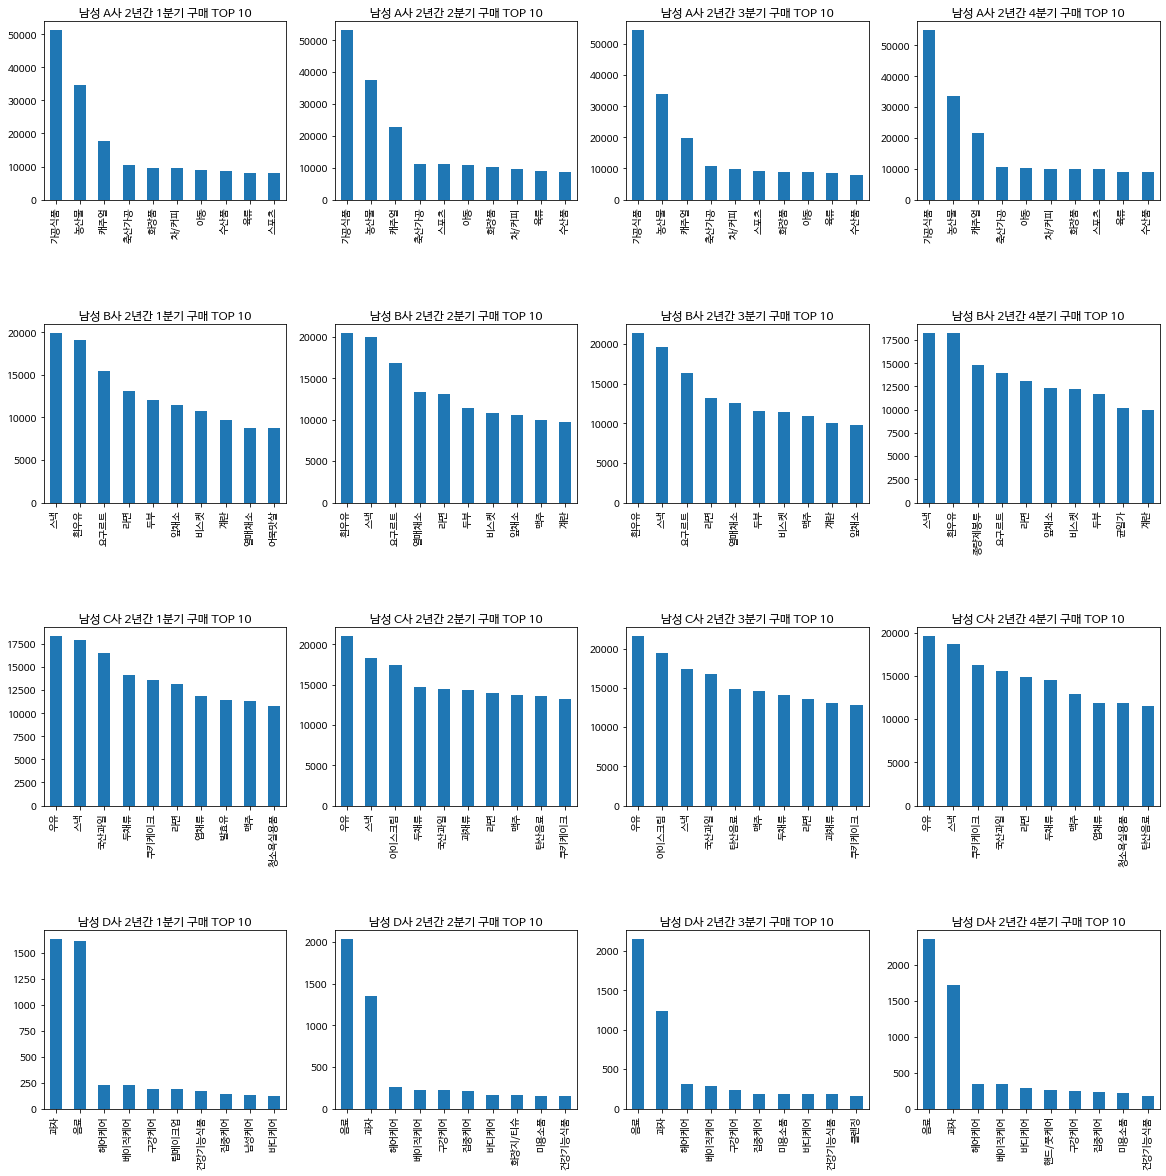

In [ ]:
# 남성 2년간 분기별 계열사별 판매 top 10
seasons = [1,2,3,4]
fig, axs = plt.subplots(figsize=(20,20), nrows=4, ncols=4)
plt.subplots_adjust(hspace=0.7,wspace=0.2)

for num1,i in enumerate(brand_m):
    row = num1
    for num2, season in enumerate(seasons):
        col = num2
        i.query(f'분기=={season}')['중분류명'].value_counts()[:10].plot(kind='bar', ax=axs[row][col],
                            title='남성 {}사 2년간 {}분기 구매 TOP 10'.format(i['제휴사'].unique()[0], season))

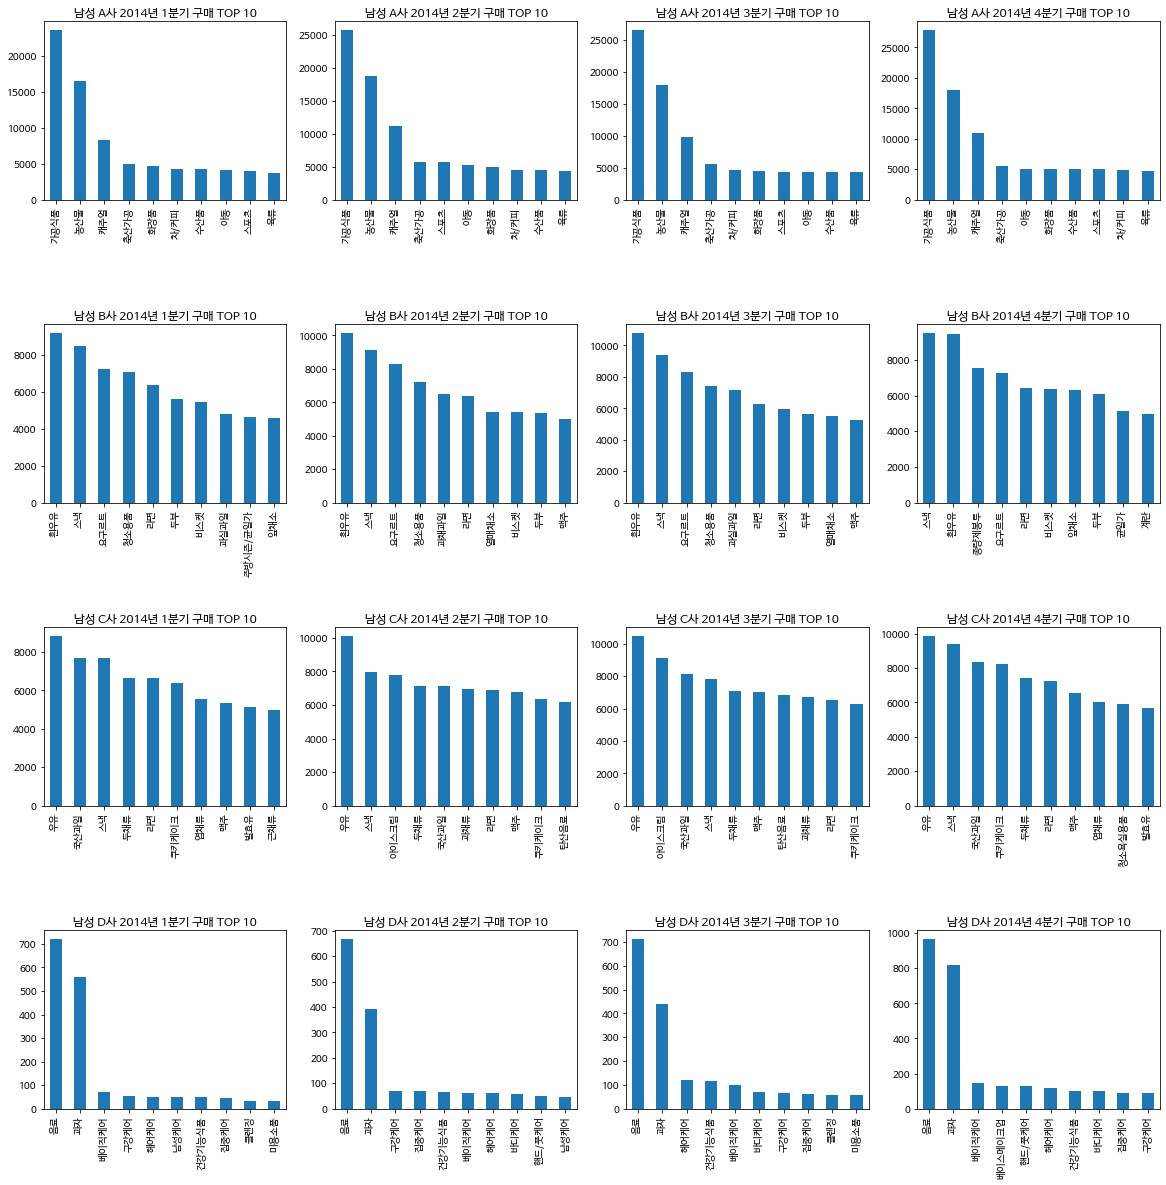

In [ ]:
# 남성 2014년 분기별 계열사별 판매 top 10
seasons = [1,2,3,4]
fig, axs = plt.subplots(figsize=(20,20), nrows=4, ncols=4)
plt.subplots_adjust(hspace=0.7,wspace=0.2)

for num1,i in enumerate(brand_m):
    row = num1
    for num2, season in enumerate(seasons):
        col = num2
        i = i.query('년==2014')
        i.query(f'분기=={season}')['중분류명'].value_counts()[:10].plot(kind='bar', ax=axs[row][col],
                            title='남성 {}사 2014년 {}분기 구매 TOP 10'.format(i['제휴사'].unique()[0], season))

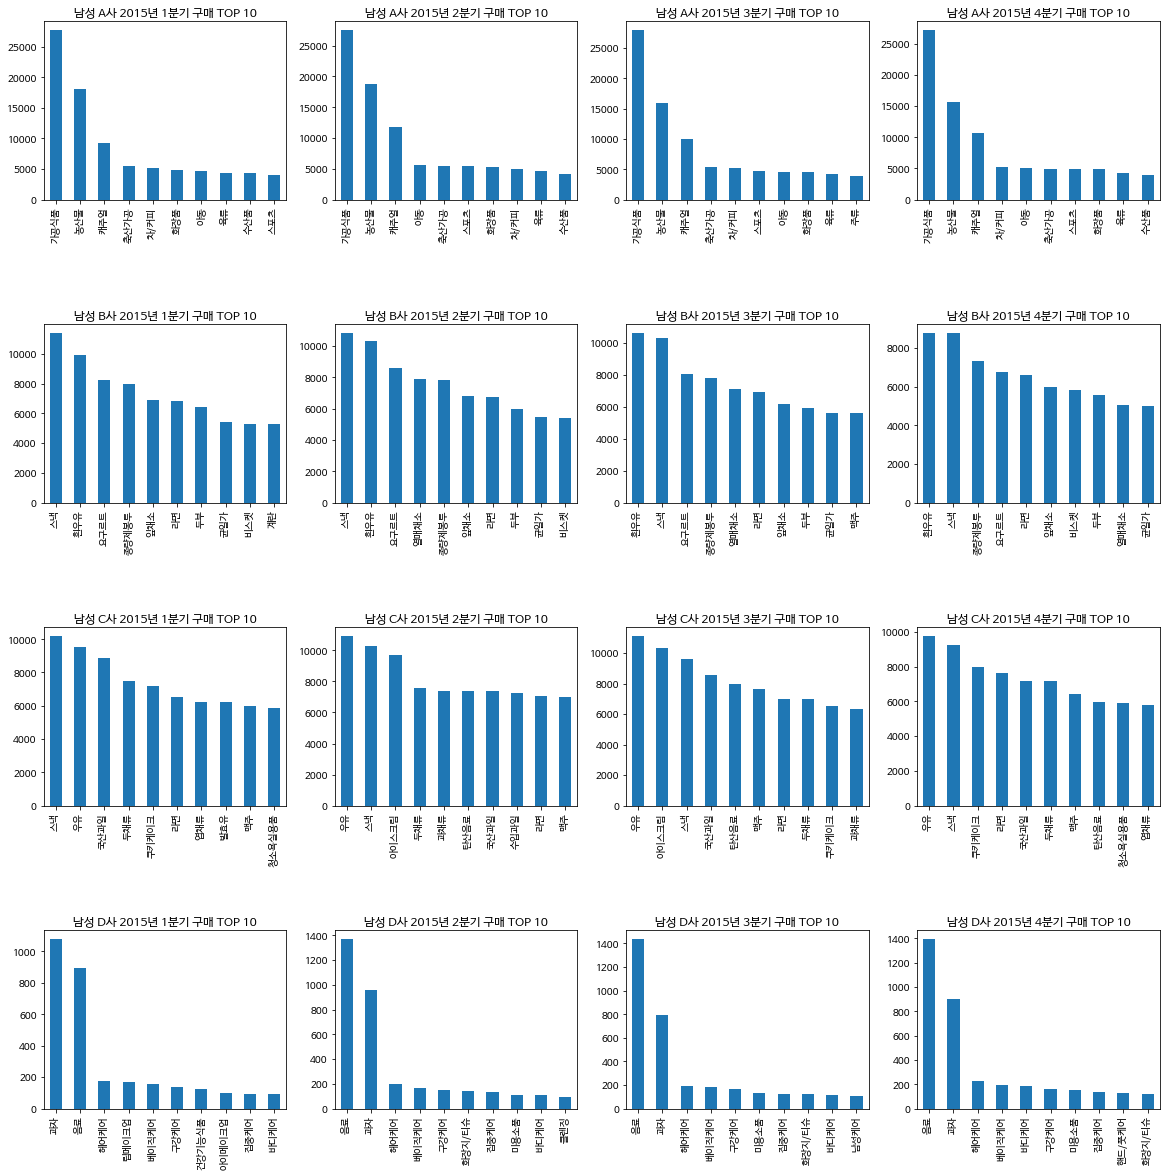

In [ ]:
# 남성 2015년 분기별 계열사별 판매 top 10
seasons = [1,2,3,4]
fig, axs = plt.subplots(figsize=(20,20), nrows=4, ncols=4)
plt.subplots_adjust(hspace=0.7,wspace=0.2)

for num1,i in enumerate(brand_m):
    row = num1
    for num2, season in enumerate(seasons):
        col = num2
        i = i.query('년==2015')
        i.query(f'분기=={season}')['중분류명'].value_counts()[:10].plot(kind='bar', ax=axs[row][col],
                            title='남성 {}사 2015년 {}분기 구매 TOP 10'.format(i['제휴사'].unique()[0], season))

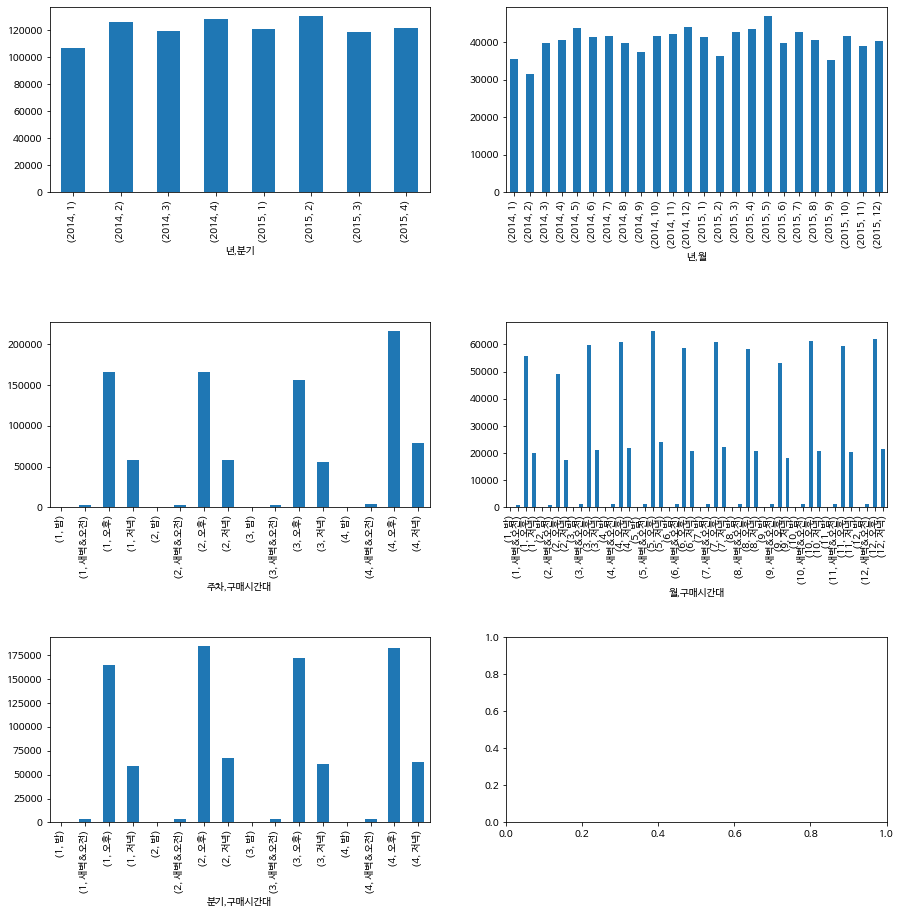

In [ ]:
fig, axs = plt.subplots(figsize=(15,15), nrows=3, ncols=2)
plt.subplots_adjust(hspace=0.7,wspace=0.2)

a.groupby(['년','분기'])['영수증번호'].count().plot(kind='bar',ax=axs[0,0])
a.groupby(['년','월'])['영수증번호'].count().plot(kind='bar',ax=axs[0,1] )
a.groupby(['주차','구매시간대'])['영수증번호'].count().plot(kind='bar',ax=axs[1,0] )
a.groupby(['월','구매시간대'])['영수증번호'].count().plot(kind='bar',ax=axs[1,1] )
a.groupby(['분기','구매시간대'])['영수증번호'].count().plot(kind='bar',ax=axs[2,0] )

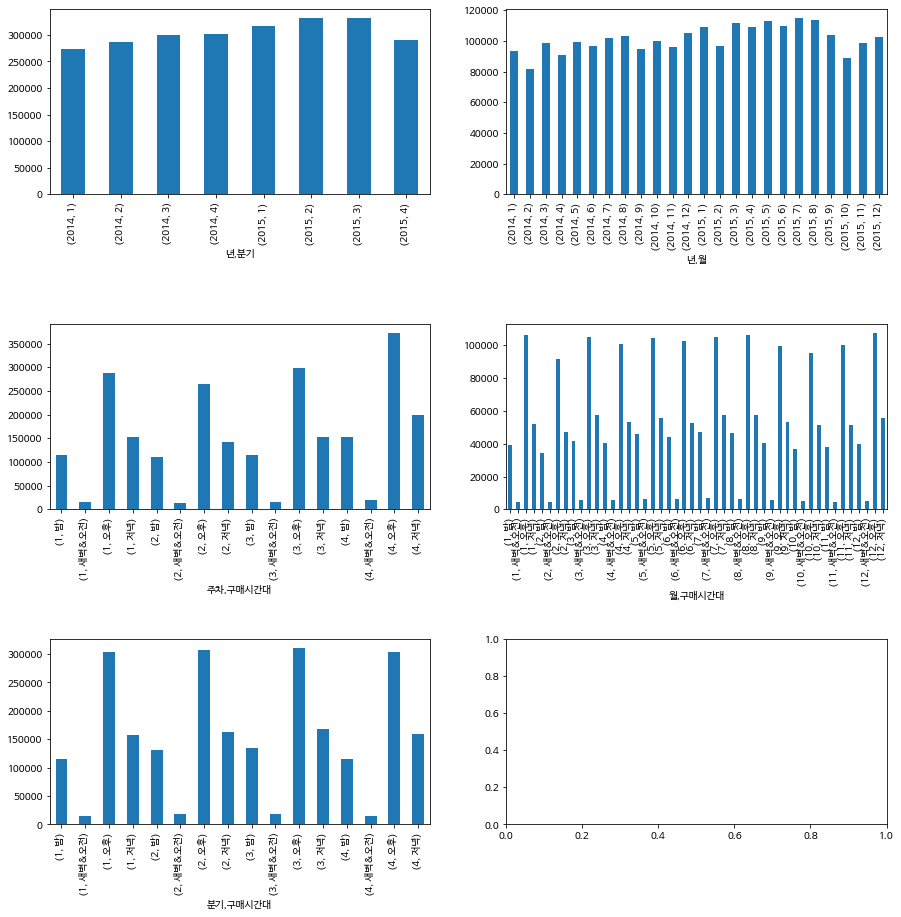

In [ ]:
fig, axs = plt.subplots(figsize=(15,15), nrows=3, ncols=2)
plt.subplots_adjust(hspace=0.7,wspace=0.2)

b.groupby(['년','분기'])['영수증번호'].count().plot(kind='bar',ax=axs[0,0])
b.groupby(['년','월'])['영수증번호'].count().plot(kind='bar',ax=axs[0,1] )
b.groupby(['주차','구매시간대'])['영수증번호'].count().plot(kind='bar',ax=axs[1,0] )
b.groupby(['월','구매시간대'])['영수증번호'].count().plot(kind='bar',ax=axs[1,1] )
b.groupby(['분기','구매시간대'])['영수증번호'].count().plot(kind='bar',ax=axs[2,0] )

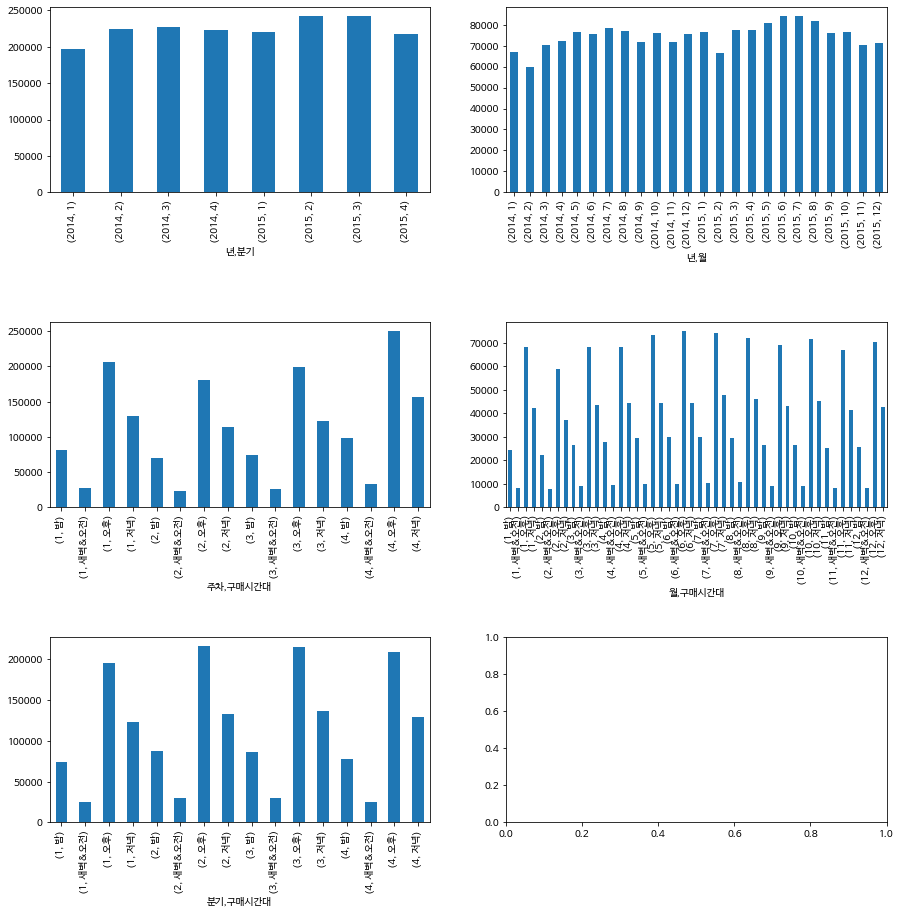

In [ ]:
fig, axs = plt.subplots(figsize=(15,15), nrows=3, ncols=2)
plt.subplots_adjust(hspace=0.7,wspace=0.2)

c.groupby(['년','분기'])['영수증번호'].count().plot(kind='bar',ax=axs[0,0])
c.groupby(['년','월'])['영수증번호'].count().plot(kind='bar',ax=axs[0,1] )
c.groupby(['주차','구매시간대'])['영수증번호'].count().plot(kind='bar',ax=axs[1,0] )
c.groupby(['월','구매시간대'])['영수증번호'].count().plot(kind='bar',ax=axs[1,1] )
c.groupby(['분기','구매시간대'])['영수증번호'].count().plot(kind='bar',ax=axs[2,0] )

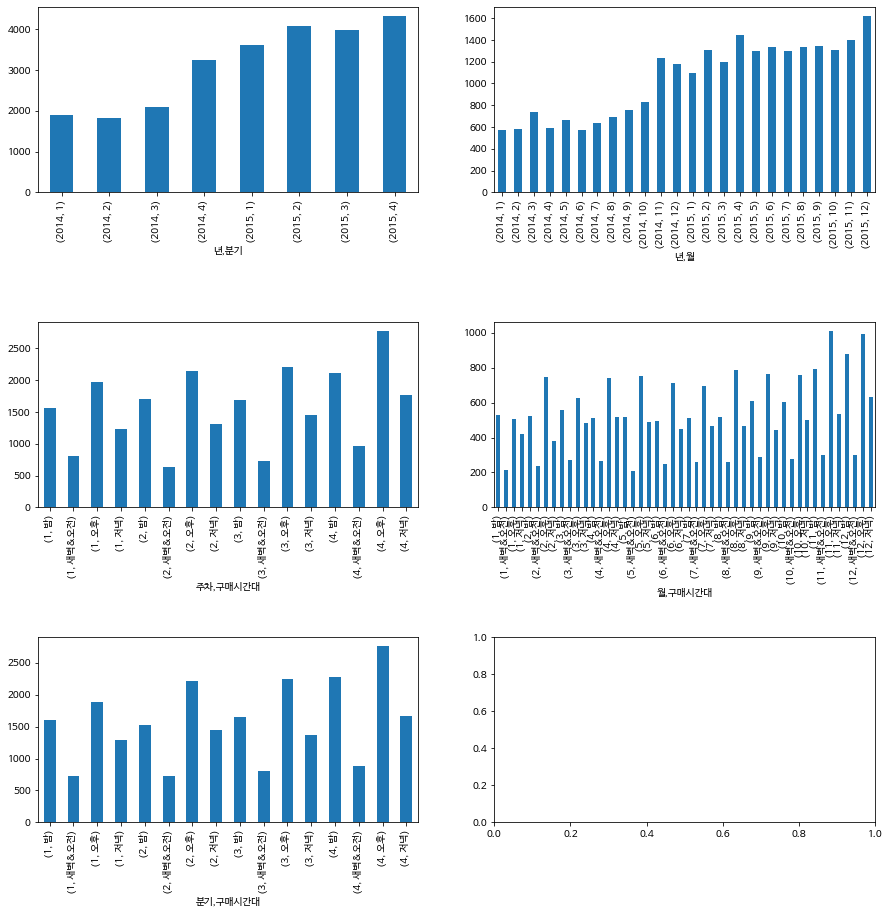

In [ ]:
fig, axs = plt.subplots(figsize=(15,15), nrows=3, ncols=2)
plt.subplots_adjust(hspace=0.7,wspace=0.2)

d.groupby(['년','분기'])['영수증번호'].count().plot(kind='bar',ax=axs[0,0])
d.groupby(['년','월'])['영수증번호'].count().plot(kind='bar',ax=axs[0,1] )
d.groupby(['주차','구매시간대'])['영수증번호'].count().plot(kind='bar',ax=axs[1,0] )
d.groupby(['월','구매시간대'])['영수증번호'].count().plot(kind='bar',ax=axs[1,1] )
d.groupby(['분기','구매시간대'])['영수증번호'].count().plot(kind='bar',ax=axs[2,0] )

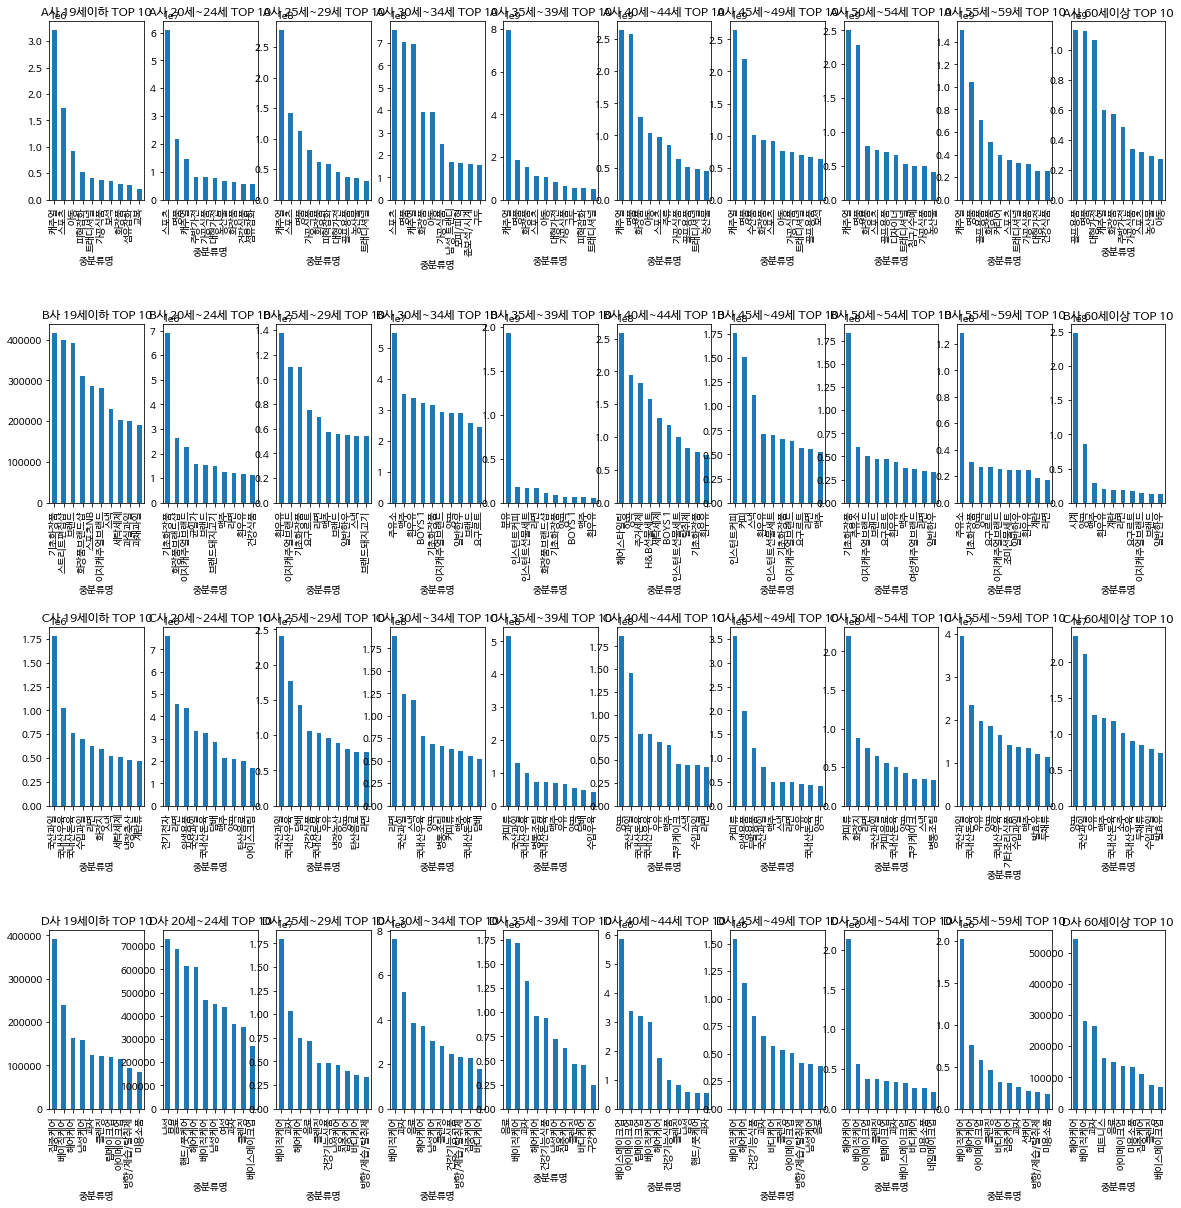

In [ ]:
# 남성 연령대별 총구매액 높은순 탑 10
seasons = [1,2,3,4]
Age = ['19세이하','20세~24세', '25세~29세','30세~34세','35세~39세','40세~44세','45세~49세','50세~54세','55세~59세','60세이상']
fig, axs = plt.subplots(figsize=(20,20), nrows=4, ncols=10)
plt.subplots_adjust(hspace=0.7,wspace=0.2)

for num1,i in enumerate(brand_m):
    row = num1
    for num2, age in enumerate(Age):
        col = num2
        i.query(f'연령대=="{age}"').groupby('중분류명')['구매금액'].sum().sort_values(ascending=False)[:10].plot(kind='bar', ax=axs[row][col],
                            title='{}사 {} TOP 10'.format(i['제휴사'].unique()[0], age))

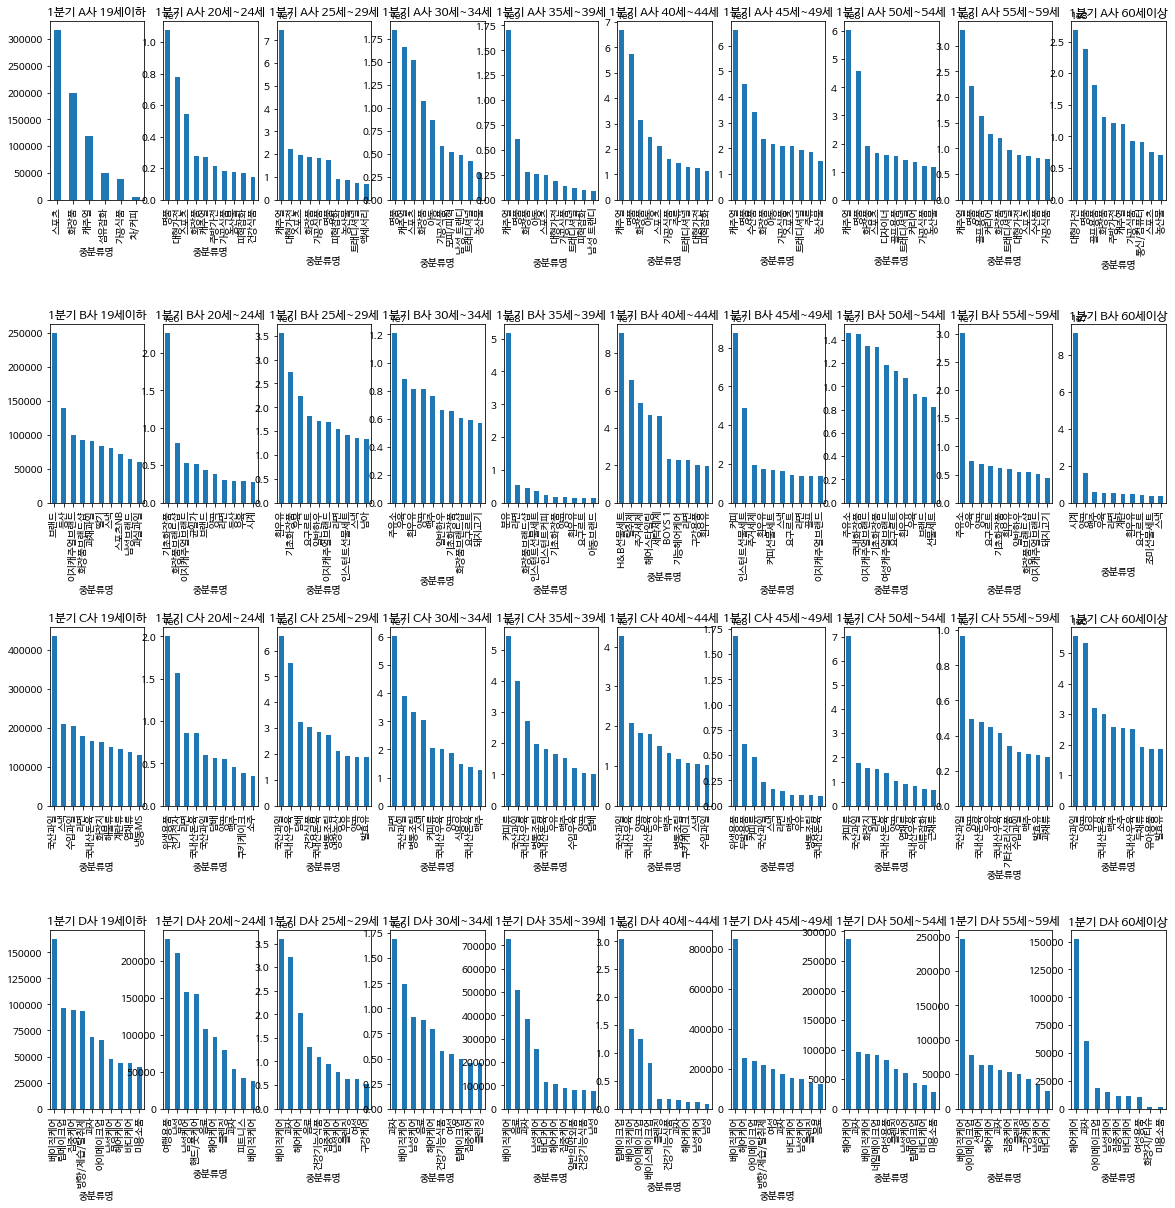

In [ ]:
# 남성 연령대별 총구매액 높은순 탑 10 - 1 분기
seasons = [1,2,3,4]
Age = ['19세이하','20세~24세', '25세~29세','30세~34세','35세~39세','40세~44세','45세~49세','50세~54세','55세~59세','60세이상']
fig, axs = plt.subplots(figsize=(20,20), nrows=4, ncols=10)
plt.subplots_adjust(hspace=0.7,wspace=0.2)

for num1,i in enumerate(brand_m):
    row = num1
    for num2, age in enumerate(Age):
        col = num2
        i.query(f'연령대=="{age}"&분기==1').groupby('중분류명')['구매금액'].sum().sort_values(ascending=False)[:10].plot(kind='bar', ax=axs[row][col],
                            title='1분기 {}사 {}'.format(i['제휴사'].unique()[0], age))

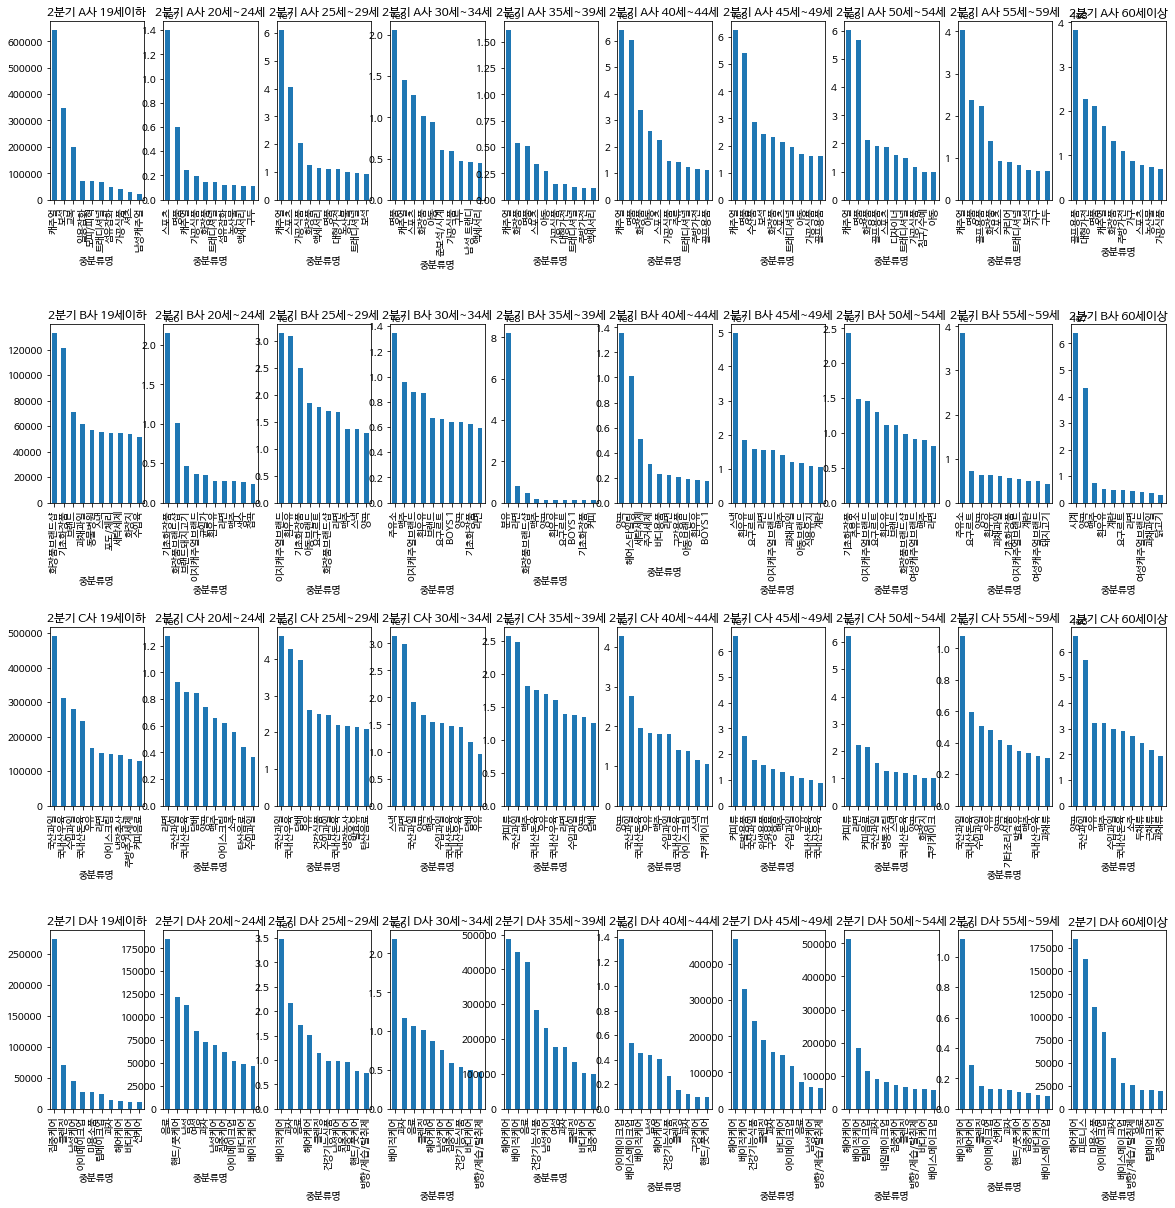

In [ ]:
# 남성 연령대별 총구매액 높은순 탑 10 - 2 분기
seasons = [1,2,3,4]
Age = ['19세이하','20세~24세', '25세~29세','30세~34세','35세~39세','40세~44세','45세~49세','50세~54세','55세~59세','60세이상']
fig, axs = plt.subplots(figsize=(20,20), nrows=4, ncols=10)
plt.subplots_adjust(hspace=0.7,wspace=0.2)

for num1,i in enumerate(brand_m):
    row = num1
    for num2, age in enumerate(Age): 
        col = num2
        i.query(f'연령대=="{age}"&분기==2').groupby('중분류명')['구매금액'].sum().sort_values(ascending=False)[:10].plot(kind='bar', ax=axs[row][col],
                            title='2분기 {}사 {}'.format(i['제휴사'].unique()[0], age))

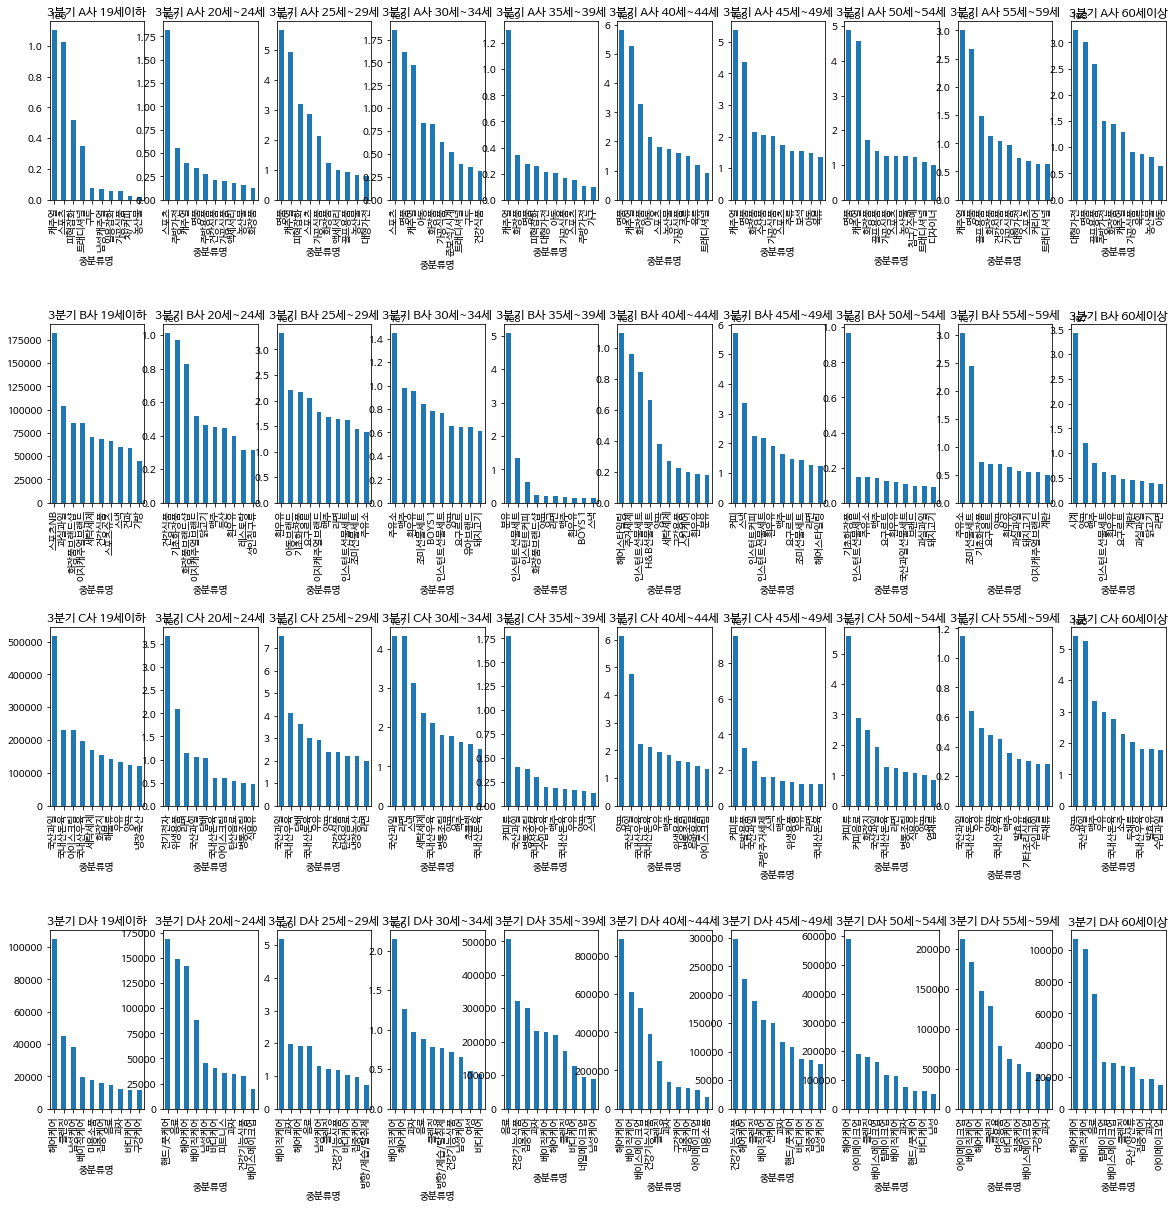

In [ ]:
# 남성 연령대별 총구매액 높은순 탑 10 - 3 분기
seasons = [1,2,3,4]
Age = ['19세이하','20세~24세', '25세~29세','30세~34세','35세~39세','40세~44세','45세~49세','50세~54세','55세~59세','60세이상']
fig, axs = plt.subplots(figsize=(20,20), nrows=4, ncols=10)
plt.subplots_adjust(hspace=0.7,wspace=0.2)

for num1,i in enumerate(brand_m):
    row = num1
    for num2, age in enumerate(Age):
        col = num2
        i.query(f'연령대=="{age}"&분기==3').groupby('중분류명')['구매금액'].sum().sort_values(ascending=False)[:10].plot(kind='bar', ax=axs[row][col],
                            title='3분기 {}사 {}'.format(i['제휴사'].unique()[0], age))

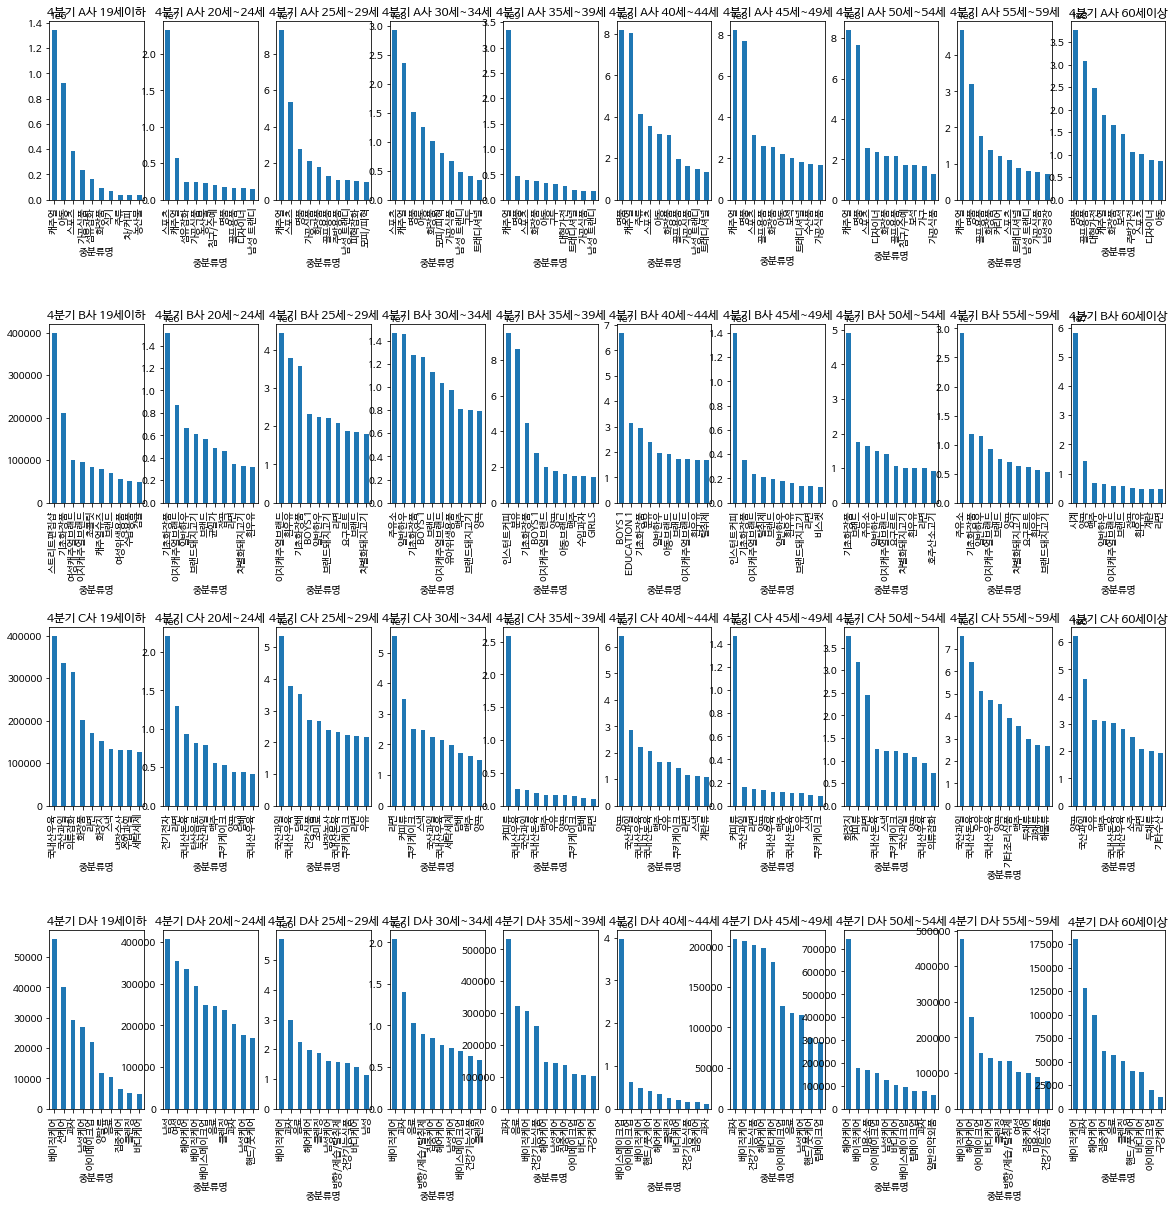

In [ ]:
# 남성 연령대별 총구매액 높은순 탑 10 - 4 분기
seasons = [1,2,3,4]
Age = ['19세이하','20세~24세', '25세~29세','30세~34세','35세~39세','40세~44세','45세~49세','50세~54세','55세~59세','60세이상']
fig, axs = plt.subplots(figsize=(20,20), nrows=4, ncols=10)
plt.subplots_adjust(hspace=0.7,wspace=0.2)

for num1,i in enumerate(brand_m):
    row = num1
    for num2, age in enumerate(Age):
        col = num2
        i.query(f'연령대=="{age}"&분기==4').groupby('중분류명')['구매금액'].sum().sort_values(ascending=False)[:10].plot(kind='bar', ax=axs[row][col],
                            title='4분기 {}사 {}'.format(i['제휴사'].unique()[0], age))

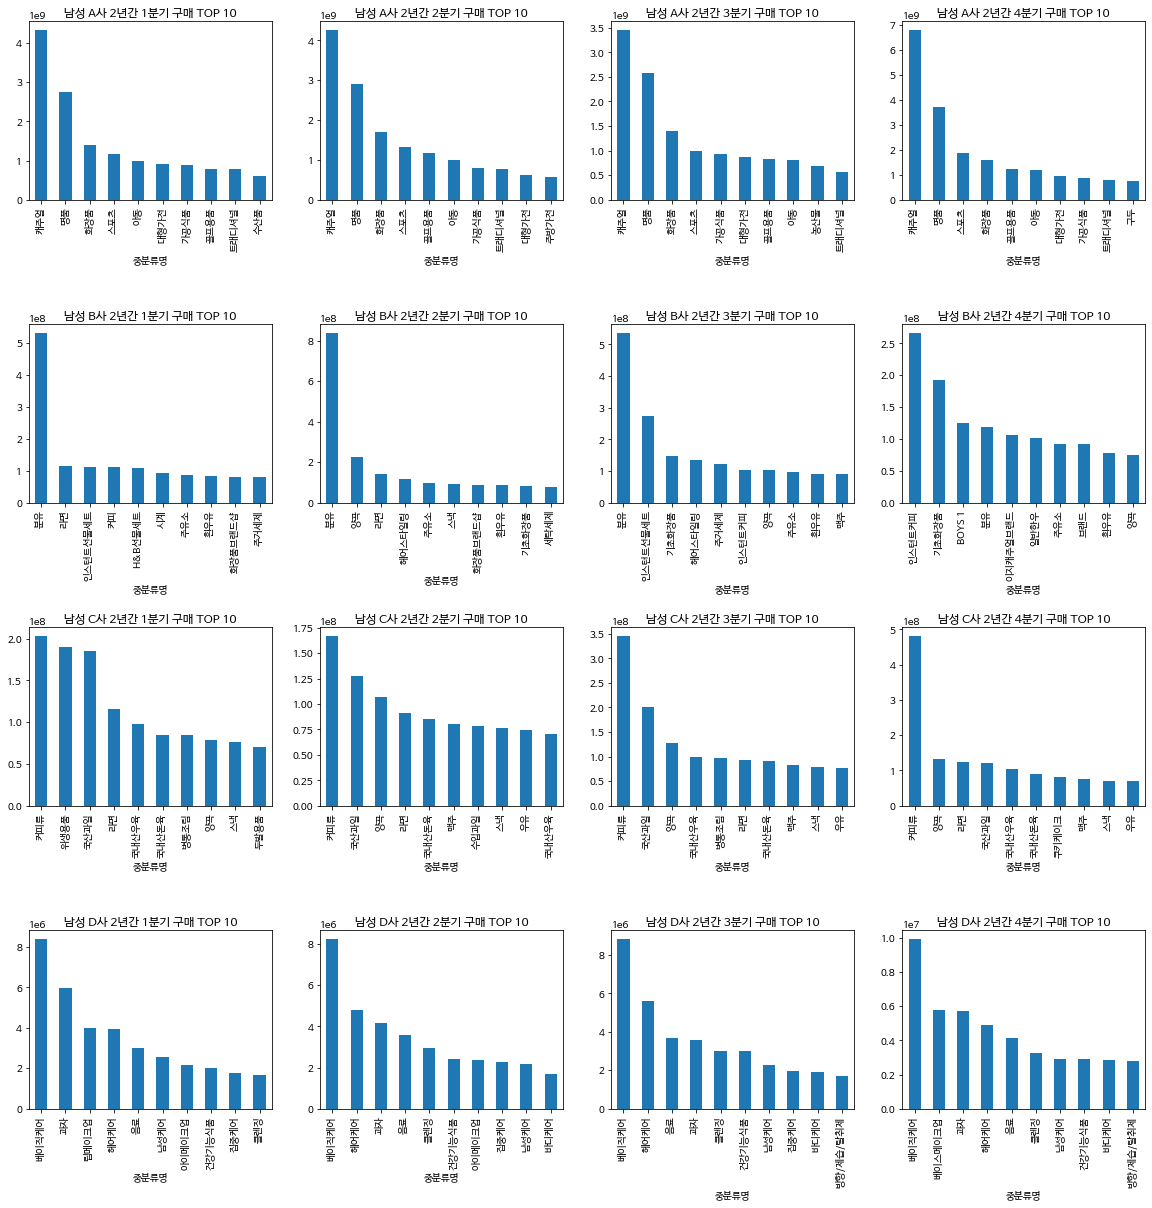

In [ ]:
# 남성 계열사별 분기별 총구매액 높은순 탑 10
seasons = [1,2,3,4]
fig, axs = plt.subplots(figsize=(20,20), nrows=4, ncols=4)
plt.subplots_adjust(hspace=0.7,wspace=0.2)

for num1,i in enumerate(brand_m):
    row = num1
    for num2, season in enumerate(seasons):
        col = num2
        i.query(f'분기=={season}').groupby('중분류명')['구매금액'].sum().sort_values(ascending=False)[:10].plot(kind='bar', ax=axs[row][col],
                            title='남성 {}사 2년간 {}분기 구매 TOP 10'.format(i['제휴사'].unique()[0], season))

In [ ]:
data['성별'].value_counts()

F    23372439
M     5220591
Name: 성별, dtype: int64